# Import dependencies

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
import os
import random
import pickle

In [18]:
from sklearn.model_selection import train_test_split

# GPU memory growth

In [3]:
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# EDA

In [7]:
dataset = pd.read_excel('./data/input.xlsx')
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [10]:
output_keys = ['Y1', 'Y2']
input_keys = list(dataset.columns[:-2])

In [14]:
dataset.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889430,0.895785
X6,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
X7,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269842,0.207505
X8,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


In [19]:
dataset.sample(frac = 1).reset_index(drop = True)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.82,612.5,318.5,147.0,7.0,4,0.00,0,16.95,21.16
1,0.79,637.0,343.0,147.0,7.0,5,0.40,4,42.96,39.56
2,0.64,784.0,343.0,220.5,3.5,5,0.25,2,17.11,20.43
3,0.62,808.5,367.5,220.5,3.5,2,0.25,5,13.68,15.19
4,0.90,563.5,318.5,122.5,7.0,4,0.10,2,28.83,29.36
...,...,...,...,...,...,...,...,...,...,...
763,0.90,563.5,318.5,122.5,7.0,2,0.10,5,29.83,29.82
764,0.69,735.0,294.0,220.5,3.5,3,0.40,2,14.71,17.01
765,0.64,784.0,343.0,220.5,3.5,2,0.40,1,19.52,22.72
766,0.82,612.5,318.5,147.0,7.0,4,0.25,2,25.38,26.72


In [94]:
train, test = train_test_split(dataset, test_size=0.2)
train.shape, test.shape

((614, 10), (154, 10))

In [95]:
train_stats = train.describe()
train_stats

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.764300,671.834691,316.664495,177.585098,5.204397,3.514658,0.232329,2.807818,21.989782,24.303713
std,0.106649,88.506260,42.706134,45.307507,1.750832,1.117390,0.134387,1.541869,10.054601,9.463413
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,6.010000,10.900000
25%,0.690000,588.000000,294.000000,147.000000,3.500000,3.000000,0.100000,2.000000,12.935000,15.507500
50%,0.740000,686.000000,318.500000,220.500000,3.500000,4.000000,0.250000,3.000000,17.785000,21.365000
75%,0.860000,735.000000,343.000000,220.500000,7.000000,5.000000,0.400000,4.000000,31.240000,32.997500
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,42.960000,48.030000


In [96]:
train_stats.pop('Y1')
train_stats.pop('Y2')

train_stats

,X1,X2,X3,X4,X5,X6,X7,X8
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.764300,671.834691,316.664495,177.585098,5.204397,3.514658,0.232329,2.807818
std,0.106649,88.506260,42.706134,45.307507,1.750832,1.117390,0.134387,1.541869
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000
25%,0.690000,588.000000,294.000000,147.000000,3.500000,3.000000,0.100000,2.000000
50%,0.740000,686.000000,318.500000,220.500000,3.500000,4.000000,0.250000,3.000000
75%,0.860000,735.000000,343.000000,220.500000,7.000000,5.000000,0.400000,4.000000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000


In [97]:
train_stats = train_stats.transpose()

In [98]:
train_Y1 = np.array(train.pop('Y1'))
train_Y2 = np.array(train.pop('Y2'))

train_Y = [train_Y1, train_Y2]

In [99]:
test_Y1 = np.array(test.pop('Y1'))
test_Y2 = np.array(test.pop('Y2'))

test_Y = [test_Y1, test_Y2]

In [100]:
train_X = (train - train_stats['mean']) / train_stats['std']
test_X = (test - train_stats['mean']) / train_stats['std']

In [101]:
with open('stats.pkl', 'wb+') as file:
    pickle.dump(train_stats, file)

# Create the model

In [102]:
def create_model(shape):
    inputs = tf.keras.Input(shape = shape)
    first_dense = tf.keras.layers.Dense(128, activation = 'relu')(inputs)
    second_dense = tf.keras.layers.Dense(128, activation = 'relu')(first_dense)
    
    y1_output = tf.keras.layers.Dense(1, activation = 'linear', name = 'y1_outputs')(second_dense)
    
    third_dense = tf.keras.layers.Dense(64, activation = 'relu')(second_dense)
    
    y2_output = tf.keras.layers.Dense(1, activation= 'linear', name = 'y2_outputs')(third_dense)
    
    model = tf.keras.Model(inputs = inputs, outputs = [y1_output, y2_output])
    print(model.summary())
    return model
model = create_model((8,))

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_15 (Dense)               (None, 128)          1152        ['input_6[0][0]']                
                                                                                                  
 dense_16 (Dense)               (None, 128)          16512       ['dense_15[0][0]']               
                                                                                                  
 dense_17 (Dense)               (None, 64)           8256        ['dense_16[0][0]']               
                                                                                            

In [103]:
optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001)
losses = { 'y1_outputs': 'mse', 'y2_outputs': 'mse' }
metrics = { 'y1_outputs': tf.keras.metrics.RootMeanSquaredError(),
            'y2_outputs': tf.keras.metrics.RootMeanSquaredError()
          }

model.compile(optimizer = optimizer, loss = losses, metrics = metrics)

In [104]:
history = model.fit(train_X, train_Y, epochs = 2000, batch_size = 10, validation_data=(test_X, test_Y))

Epoch 1/2000
62/62 [==============================] - 1s 11ms/step - loss: 651.1071 - y1_outputs_loss: 338.2096 - y2_outputs_loss: 312.8976 - y1_outputs_root_mean_squared_error: 18.3905 - y2_outputs_root_mean_squared_error: 17.6889 - val_loss: 150.5892 - val_y1_outputs_loss: 103.8566 - val_y2_outputs_loss: 46.7327 - val_y1_outputs_root_mean_squared_error: 10.1910 - val_y2_outputs_root_mean_squared_error: 6.8361
Epoch 2/2000
62/62 [==============================] - 1s 8ms/step - loss: 74.5102 - y1_outputs_loss: 39.2770 - y2_outputs_loss: 35.2332 - y1_outputs_root_mean_squared_error: 6.2671 - y2_outputs_root_mean_squared_error: 5.9358 - val_loss: 62.7262 - val_y1_outputs_loss: 29.6077 - val_y2_outputs_loss: 33.1184 - val_y1_outputs_root_mean_squared_error: 5.4413 - val_y2_outputs_root_mean_squared_error: 5.7549
Epoch 3/2000
62/62 [==============================] - 0s 7ms/step - loss: 49.3177 - y1_outputs_loss: 22.7716 - y2_outputs_loss: 26.5461 - y1_outputs_root_mean_squared_error: 4.772

62/62 [==============================] - 0s 8ms/step - loss: 13.1423 - y1_outputs_loss: 5.7407 - y2_outputs_loss: 7.4016 - y1_outputs_root_mean_squared_error: 2.3960 - y2_outputs_root_mean_squared_error: 2.7206 - val_loss: 16.0848 - val_y1_outputs_loss: 7.1278 - val_y2_outputs_loss: 8.9569 - val_y1_outputs_root_mean_squared_error: 2.6698 - val_y2_outputs_root_mean_squared_error: 2.9928
Epoch 22/2000
62/62 [==============================] - 0s 8ms/step - loss: 12.3236 - y1_outputs_loss: 5.3301 - y2_outputs_loss: 6.9935 - y1_outputs_root_mean_squared_error: 2.3087 - y2_outputs_root_mean_squared_error: 2.6445 - val_loss: 16.9446 - val_y1_outputs_loss: 7.3276 - val_y2_outputs_loss: 9.6171 - val_y1_outputs_root_mean_squared_error: 2.7069 - val_y2_outputs_root_mean_squared_error: 3.1011
Epoch 23/2000
62/62 [==============================] - 1s 9ms/step - loss: 12.5248 - y1_outputs_loss: 5.3886 - y2_outputs_loss: 7.1362 - y1_outputs_root_mean_squared_error: 2.3213 - y2_outputs_root_mean_squar

62/62 [==============================] - 1s 9ms/step - loss: 7.5240 - y1_outputs_loss: 3.0344 - y2_outputs_loss: 4.4896 - y1_outputs_root_mean_squared_error: 1.7419 - y2_outputs_root_mean_squared_error: 2.1189 - val_loss: 9.8130 - val_y1_outputs_loss: 3.8969 - val_y2_outputs_loss: 5.9162 - val_y1_outputs_root_mean_squared_error: 1.9740 - val_y2_outputs_root_mean_squared_error: 2.4323
Epoch 42/2000
62/62 [==============================] - 1s 9ms/step - loss: 7.5110 - y1_outputs_loss: 2.9055 - y2_outputs_loss: 4.6055 - y1_outputs_root_mean_squared_error: 1.7045 - y2_outputs_root_mean_squared_error: 2.1461 - val_loss: 8.6427 - val_y1_outputs_loss: 3.6841 - val_y2_outputs_loss: 4.9586 - val_y1_outputs_root_mean_squared_error: 1.9194 - val_y2_outputs_root_mean_squared_error: 2.2268
Epoch 43/2000
62/62 [==============================] - 1s 12ms/step - loss: 6.2286 - y1_outputs_loss: 2.5728 - y2_outputs_loss: 3.6558 - y1_outputs_root_mean_squared_error: 1.6040 - y2_outputs_root_mean_squared_e

62/62 [==============================] - 1s 9ms/step - loss: 2.8857 - y1_outputs_loss: 0.9752 - y2_outputs_loss: 1.9105 - y1_outputs_root_mean_squared_error: 0.9875 - y2_outputs_root_mean_squared_error: 1.3822 - val_loss: 5.0807 - val_y1_outputs_loss: 1.4667 - val_y2_outputs_loss: 3.6140 - val_y1_outputs_root_mean_squared_error: 1.2111 - val_y2_outputs_root_mean_squared_error: 1.9011
Epoch 62/2000
62/62 [==============================] - 0s 8ms/step - loss: 2.5675 - y1_outputs_loss: 0.8979 - y2_outputs_loss: 1.6696 - y1_outputs_root_mean_squared_error: 0.9476 - y2_outputs_root_mean_squared_error: 1.2921 - val_loss: 3.4560 - val_y1_outputs_loss: 1.1802 - val_y2_outputs_loss: 2.2759 - val_y1_outputs_root_mean_squared_error: 1.0864 - val_y2_outputs_root_mean_squared_error: 1.5086
Epoch 63/2000
62/62 [==============================] - 0s 8ms/step - loss: 2.3762 - y1_outputs_loss: 0.8151 - y2_outputs_loss: 1.5611 - y1_outputs_root_mean_squared_error: 0.9028 - y2_outputs_root_mean_squared_er

62/62 [==============================] - 0s 6ms/step - loss: 1.5302 - y1_outputs_loss: 0.4485 - y2_outputs_loss: 1.0817 - y1_outputs_root_mean_squared_error: 0.6697 - y2_outputs_root_mean_squared_error: 1.0401 - val_loss: 1.9264 - val_y1_outputs_loss: 0.6603 - val_y2_outputs_loss: 1.2662 - val_y1_outputs_root_mean_squared_error: 0.8126 - val_y2_outputs_root_mean_squared_error: 1.1252
Epoch 82/2000
62/62 [==============================] - 0s 6ms/step - loss: 1.3751 - y1_outputs_loss: 0.4185 - y2_outputs_loss: 0.9566 - y1_outputs_root_mean_squared_error: 0.6469 - y2_outputs_root_mean_squared_error: 0.9781 - val_loss: 1.9697 - val_y1_outputs_loss: 0.5826 - val_y2_outputs_loss: 1.3871 - val_y1_outputs_root_mean_squared_error: 0.7633 - val_y2_outputs_root_mean_squared_error: 1.1777
Epoch 83/2000
62/62 [==============================] - 0s 5ms/step - loss: 1.3825 - y1_outputs_loss: 0.4970 - y2_outputs_loss: 0.8855 - y1_outputs_root_mean_squared_error: 0.7050 - y2_outputs_root_mean_squared_er

62/62 [==============================] - 0s 6ms/step - loss: 1.8236 - y1_outputs_loss: 0.4112 - y2_outputs_loss: 1.4124 - y1_outputs_root_mean_squared_error: 0.6412 - y2_outputs_root_mean_squared_error: 1.1885 - val_loss: 2.9434 - val_y1_outputs_loss: 0.8137 - val_y2_outputs_loss: 2.1297 - val_y1_outputs_root_mean_squared_error: 0.9021 - val_y2_outputs_root_mean_squared_error: 1.4593
Epoch 102/2000
62/62 [==============================] - 0s 6ms/step - loss: 1.2449 - y1_outputs_loss: 0.3349 - y2_outputs_loss: 0.9100 - y1_outputs_root_mean_squared_error: 0.5787 - y2_outputs_root_mean_squared_error: 0.9539 - val_loss: 1.3167 - val_y1_outputs_loss: 0.3742 - val_y2_outputs_loss: 0.9425 - val_y1_outputs_root_mean_squared_error: 0.6117 - val_y2_outputs_root_mean_squared_error: 0.9708
Epoch 103/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.9312 - y1_outputs_loss: 0.2630 - y2_outputs_loss: 0.6682 - y1_outputs_root_mean_squared_error: 0.5128 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 6ms/step - loss: 0.7571 - y1_outputs_loss: 0.2241 - y2_outputs_loss: 0.5330 - y1_outputs_root_mean_squared_error: 0.4734 - y2_outputs_root_mean_squared_error: 0.7301 - val_loss: 1.0557 - val_y1_outputs_loss: 0.2799 - val_y2_outputs_loss: 0.7758 - val_y1_outputs_root_mean_squared_error: 0.5291 - val_y2_outputs_root_mean_squared_error: 0.8808
Epoch 122/2000
62/62 [==============================] - 0s 7ms/step - loss: 1.0180 - y1_outputs_loss: 0.2793 - y2_outputs_loss: 0.7387 - y1_outputs_root_mean_squared_error: 0.5285 - y2_outputs_root_mean_squared_error: 0.8595 - val_loss: 1.2751 - val_y1_outputs_loss: 0.5261 - val_y2_outputs_loss: 0.7490 - val_y1_outputs_root_mean_squared_error: 0.7254 - val_y2_outputs_root_mean_squared_error: 0.8654
Epoch 123/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.7240 - y1_outputs_loss: 0.2185 - y2_outputs_loss: 0.5055 - y1_outputs_root_mean_squared_error: 0.4675 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 7ms/step - loss: 0.7015 - y1_outputs_loss: 0.2490 - y2_outputs_loss: 0.4525 - y1_outputs_root_mean_squared_error: 0.4990 - y2_outputs_root_mean_squared_error: 0.6727 - val_loss: 0.7308 - val_y1_outputs_loss: 0.2748 - val_y2_outputs_loss: 0.4560 - val_y1_outputs_root_mean_squared_error: 0.5242 - val_y2_outputs_root_mean_squared_error: 0.6753
Epoch 142/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.7511 - y1_outputs_loss: 0.2135 - y2_outputs_loss: 0.5376 - y1_outputs_root_mean_squared_error: 0.4621 - y2_outputs_root_mean_squared_error: 0.7332 - val_loss: 1.1748 - val_y1_outputs_loss: 0.3838 - val_y2_outputs_loss: 0.7910 - val_y1_outputs_root_mean_squared_error: 0.6195 - val_y2_outputs_root_mean_squared_error: 0.8894
Epoch 143/2000
62/62 [==============================] - 1s 10ms/step - loss: 0.7496 - y1_outputs_loss: 0.2349 - y2_outputs_loss: 0.5148 - y1_outputs_root_mean_squared_error: 0.4846 - y2_outputs_root_mean_squared

62/62 [==============================] - 0s 7ms/step - loss: 0.5924 - y1_outputs_loss: 0.2241 - y2_outputs_loss: 0.3684 - y1_outputs_root_mean_squared_error: 0.4733 - y2_outputs_root_mean_squared_error: 0.6069 - val_loss: 1.1421 - val_y1_outputs_loss: 0.3326 - val_y2_outputs_loss: 0.8095 - val_y1_outputs_root_mean_squared_error: 0.5767 - val_y2_outputs_root_mean_squared_error: 0.8997
Epoch 162/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.5493 - y1_outputs_loss: 0.1949 - y2_outputs_loss: 0.3544 - y1_outputs_root_mean_squared_error: 0.4415 - y2_outputs_root_mean_squared_error: 0.5953 - val_loss: 0.7711 - val_y1_outputs_loss: 0.2395 - val_y2_outputs_loss: 0.5316 - val_y1_outputs_root_mean_squared_error: 0.4894 - val_y2_outputs_root_mean_squared_error: 0.7291
Epoch 163/2000
62/62 [==============================] - 1s 9ms/step - loss: 0.6610 - y1_outputs_loss: 0.2426 - y2_outputs_loss: 0.4184 - y1_outputs_root_mean_squared_error: 0.4926 - y2_outputs_root_mean_squared_

62/62 [==============================] - 1s 9ms/step - loss: 0.5602 - y1_outputs_loss: 0.2303 - y2_outputs_loss: 0.3299 - y1_outputs_root_mean_squared_error: 0.4799 - y2_outputs_root_mean_squared_error: 0.5743 - val_loss: 0.6520 - val_y1_outputs_loss: 0.2278 - val_y2_outputs_loss: 0.4243 - val_y1_outputs_root_mean_squared_error: 0.4772 - val_y2_outputs_root_mean_squared_error: 0.6514
Epoch 182/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.4962 - y1_outputs_loss: 0.1760 - y2_outputs_loss: 0.3202 - y1_outputs_root_mean_squared_error: 0.4195 - y2_outputs_root_mean_squared_error: 0.5658 - val_loss: 0.6477 - val_y1_outputs_loss: 0.2709 - val_y2_outputs_loss: 0.3768 - val_y1_outputs_root_mean_squared_error: 0.5204 - val_y2_outputs_root_mean_squared_error: 0.6139
Epoch 183/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.6761 - y1_outputs_loss: 0.2255 - y2_outputs_loss: 0.4505 - y1_outputs_root_mean_squared_error: 0.4749 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 7ms/step - loss: 0.4180 - y1_outputs_loss: 0.1596 - y2_outputs_loss: 0.2584 - y1_outputs_root_mean_squared_error: 0.3995 - y2_outputs_root_mean_squared_error: 0.5084 - val_loss: 0.5248 - val_y1_outputs_loss: 0.2285 - val_y2_outputs_loss: 0.2963 - val_y1_outputs_root_mean_squared_error: 0.4780 - val_y2_outputs_root_mean_squared_error: 0.5443
Epoch 202/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.3838 - y1_outputs_loss: 0.1477 - y2_outputs_loss: 0.2361 - y1_outputs_root_mean_squared_error: 0.3843 - y2_outputs_root_mean_squared_error: 0.4859 - val_loss: 0.6425 - val_y1_outputs_loss: 0.2782 - val_y2_outputs_loss: 0.3643 - val_y1_outputs_root_mean_squared_error: 0.5274 - val_y2_outputs_root_mean_squared_error: 0.6036
Epoch 203/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.4367 - y1_outputs_loss: 0.1774 - y2_outputs_loss: 0.2593 - y1_outputs_root_mean_squared_error: 0.4211 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 7ms/step - loss: 0.5541 - y1_outputs_loss: 0.1742 - y2_outputs_loss: 0.3799 - y1_outputs_root_mean_squared_error: 0.4174 - y2_outputs_root_mean_squared_error: 0.6163 - val_loss: 0.8203 - val_y1_outputs_loss: 0.3991 - val_y2_outputs_loss: 0.4212 - val_y1_outputs_root_mean_squared_error: 0.6318 - val_y2_outputs_root_mean_squared_error: 0.6490
Epoch 222/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.4769 - y1_outputs_loss: 0.2032 - y2_outputs_loss: 0.2738 - y1_outputs_root_mean_squared_error: 0.4507 - y2_outputs_root_mean_squared_error: 0.5232 - val_loss: 0.5532 - val_y1_outputs_loss: 0.2239 - val_y2_outputs_loss: 0.3293 - val_y1_outputs_root_mean_squared_error: 0.4732 - val_y2_outputs_root_mean_squared_error: 0.5738
Epoch 223/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.5720 - y1_outputs_loss: 0.2042 - y2_outputs_loss: 0.3678 - y1_outputs_root_mean_squared_error: 0.4519 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 7ms/step - loss: 0.4697 - y1_outputs_loss: 0.1820 - y2_outputs_loss: 0.2877 - y1_outputs_root_mean_squared_error: 0.4266 - y2_outputs_root_mean_squared_error: 0.5364 - val_loss: 0.7132 - val_y1_outputs_loss: 0.2312 - val_y2_outputs_loss: 0.4819 - val_y1_outputs_root_mean_squared_error: 0.4809 - val_y2_outputs_root_mean_squared_error: 0.6942
Epoch 242/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.5288 - y1_outputs_loss: 0.1849 - y2_outputs_loss: 0.3439 - y1_outputs_root_mean_squared_error: 0.4300 - y2_outputs_root_mean_squared_error: 0.5864 - val_loss: 0.6312 - val_y1_outputs_loss: 0.2407 - val_y2_outputs_loss: 0.3905 - val_y1_outputs_root_mean_squared_error: 0.4906 - val_y2_outputs_root_mean_squared_error: 0.6249
Epoch 243/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.4458 - y1_outputs_loss: 0.1604 - y2_outputs_loss: 0.2854 - y1_outputs_root_mean_squared_error: 0.4005 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 7ms/step - loss: 0.4536 - y1_outputs_loss: 0.1606 - y2_outputs_loss: 0.2930 - y1_outputs_root_mean_squared_error: 0.4007 - y2_outputs_root_mean_squared_error: 0.5413 - val_loss: 0.5055 - val_y1_outputs_loss: 0.1959 - val_y2_outputs_loss: 0.3096 - val_y1_outputs_root_mean_squared_error: 0.4426 - val_y2_outputs_root_mean_squared_error: 0.5564
Epoch 262/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.3226 - y1_outputs_loss: 0.1365 - y2_outputs_loss: 0.1861 - y1_outputs_root_mean_squared_error: 0.3695 - y2_outputs_root_mean_squared_error: 0.4314 - val_loss: 0.5595 - val_y1_outputs_loss: 0.2344 - val_y2_outputs_loss: 0.3250 - val_y1_outputs_root_mean_squared_error: 0.4842 - val_y2_outputs_root_mean_squared_error: 0.5701
Epoch 263/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.5576 - y1_outputs_loss: 0.2350 - y2_outputs_loss: 0.3226 - y1_outputs_root_mean_squared_error: 0.4848 - y2_outputs_root_mean_squared_

62/62 [==============================] - 1s 11ms/step - loss: 0.6522 - y1_outputs_loss: 0.2450 - y2_outputs_loss: 0.4072 - y1_outputs_root_mean_squared_error: 0.4950 - y2_outputs_root_mean_squared_error: 0.6381 - val_loss: 1.0073 - val_y1_outputs_loss: 0.3723 - val_y2_outputs_loss: 0.6350 - val_y1_outputs_root_mean_squared_error: 0.6102 - val_y2_outputs_root_mean_squared_error: 0.7968
Epoch 282/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.4850 - y1_outputs_loss: 0.1947 - y2_outputs_loss: 0.2904 - y1_outputs_root_mean_squared_error: 0.4412 - y2_outputs_root_mean_squared_error: 0.5388 - val_loss: 0.6011 - val_y1_outputs_loss: 0.2438 - val_y2_outputs_loss: 0.3572 - val_y1_outputs_root_mean_squared_error: 0.4938 - val_y2_outputs_root_mean_squared_error: 0.5977
Epoch 283/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.3038 - y1_outputs_loss: 0.1187 - y2_outputs_loss: 0.1851 - y1_outputs_root_mean_squared_error: 0.3445 - y2_outputs_root_mean_squared

62/62 [==============================] - 0s 6ms/step - loss: 0.3214 - y1_outputs_loss: 0.1445 - y2_outputs_loss: 0.1769 - y1_outputs_root_mean_squared_error: 0.3801 - y2_outputs_root_mean_squared_error: 0.4206 - val_loss: 0.5526 - val_y1_outputs_loss: 0.2521 - val_y2_outputs_loss: 0.3005 - val_y1_outputs_root_mean_squared_error: 0.5021 - val_y2_outputs_root_mean_squared_error: 0.5482
Epoch 302/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.3171 - y1_outputs_loss: 0.1440 - y2_outputs_loss: 0.1731 - y1_outputs_root_mean_squared_error: 0.3795 - y2_outputs_root_mean_squared_error: 0.4160 - val_loss: 0.4117 - val_y1_outputs_loss: 0.1821 - val_y2_outputs_loss: 0.2296 - val_y1_outputs_root_mean_squared_error: 0.4268 - val_y2_outputs_root_mean_squared_error: 0.4792
Epoch 303/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.3015 - y1_outputs_loss: 0.1220 - y2_outputs_loss: 0.1795 - y1_outputs_root_mean_squared_error: 0.3492 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 8ms/step - loss: 0.2529 - y1_outputs_loss: 0.1001 - y2_outputs_loss: 0.1529 - y1_outputs_root_mean_squared_error: 0.3163 - y2_outputs_root_mean_squared_error: 0.3910 - val_loss: 0.5682 - val_y1_outputs_loss: 0.1822 - val_y2_outputs_loss: 0.3861 - val_y1_outputs_root_mean_squared_error: 0.4268 - val_y2_outputs_root_mean_squared_error: 0.6213
Epoch 322/2000
62/62 [==============================] - 1s 13ms/step - loss: 0.2874 - y1_outputs_loss: 0.1195 - y2_outputs_loss: 0.1678 - y1_outputs_root_mean_squared_error: 0.3458 - y2_outputs_root_mean_squared_error: 0.4097 - val_loss: 0.6144 - val_y1_outputs_loss: 0.2242 - val_y2_outputs_loss: 0.3902 - val_y1_outputs_root_mean_squared_error: 0.4735 - val_y2_outputs_root_mean_squared_error: 0.6246
Epoch 323/2000
62/62 [==============================] - 1s 9ms/step - loss: 0.3821 - y1_outputs_loss: 0.1446 - y2_outputs_loss: 0.2375 - y1_outputs_root_mean_squared_error: 0.3803 - y2_outputs_root_mean_squared

62/62 [==============================] - 1s 8ms/step - loss: 0.2886 - y1_outputs_loss: 0.1306 - y2_outputs_loss: 0.1580 - y1_outputs_root_mean_squared_error: 0.3613 - y2_outputs_root_mean_squared_error: 0.3975 - val_loss: 0.5562 - val_y1_outputs_loss: 0.2645 - val_y2_outputs_loss: 0.2917 - val_y1_outputs_root_mean_squared_error: 0.5143 - val_y2_outputs_root_mean_squared_error: 0.5401
Epoch 342/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.3094 - y1_outputs_loss: 0.1565 - y2_outputs_loss: 0.1529 - y1_outputs_root_mean_squared_error: 0.3956 - y2_outputs_root_mean_squared_error: 0.3910 - val_loss: 0.5671 - val_y1_outputs_loss: 0.2386 - val_y2_outputs_loss: 0.3285 - val_y1_outputs_root_mean_squared_error: 0.4885 - val_y2_outputs_root_mean_squared_error: 0.5731
Epoch 343/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.5889 - y1_outputs_loss: 0.1845 - y2_outputs_loss: 0.4044 - y1_outputs_root_mean_squared_error: 0.4295 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 7ms/step - loss: 0.3039 - y1_outputs_loss: 0.1170 - y2_outputs_loss: 0.1869 - y1_outputs_root_mean_squared_error: 0.3421 - y2_outputs_root_mean_squared_error: 0.4323 - val_loss: 0.4588 - val_y1_outputs_loss: 0.1961 - val_y2_outputs_loss: 0.2627 - val_y1_outputs_root_mean_squared_error: 0.4428 - val_y2_outputs_root_mean_squared_error: 0.5126
Epoch 362/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.3137 - y1_outputs_loss: 0.1353 - y2_outputs_loss: 0.1784 - y1_outputs_root_mean_squared_error: 0.3678 - y2_outputs_root_mean_squared_error: 0.4224 - val_loss: 0.6123 - val_y1_outputs_loss: 0.2745 - val_y2_outputs_loss: 0.3378 - val_y1_outputs_root_mean_squared_error: 0.5239 - val_y2_outputs_root_mean_squared_error: 0.5812
Epoch 363/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.3282 - y1_outputs_loss: 0.1336 - y2_outputs_loss: 0.1946 - y1_outputs_root_mean_squared_error: 0.3656 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 6ms/step - loss: 0.3548 - y1_outputs_loss: 0.1555 - y2_outputs_loss: 0.1993 - y1_outputs_root_mean_squared_error: 0.3943 - y2_outputs_root_mean_squared_error: 0.4465 - val_loss: 0.5066 - val_y1_outputs_loss: 0.2440 - val_y2_outputs_loss: 0.2626 - val_y1_outputs_root_mean_squared_error: 0.4940 - val_y2_outputs_root_mean_squared_error: 0.5124
Epoch 382/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.2026 - y1_outputs_loss: 0.0997 - y2_outputs_loss: 0.1029 - y1_outputs_root_mean_squared_error: 0.3158 - y2_outputs_root_mean_squared_error: 0.3207 - val_loss: 0.5091 - val_y1_outputs_loss: 0.2671 - val_y2_outputs_loss: 0.2420 - val_y1_outputs_root_mean_squared_error: 0.5168 - val_y2_outputs_root_mean_squared_error: 0.4919
Epoch 383/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.3045 - y1_outputs_loss: 0.1225 - y2_outputs_loss: 0.1819 - y1_outputs_root_mean_squared_error: 0.3500 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 7ms/step - loss: 0.1882 - y1_outputs_loss: 0.0967 - y2_outputs_loss: 0.0916 - y1_outputs_root_mean_squared_error: 0.3109 - y2_outputs_root_mean_squared_error: 0.3026 - val_loss: 0.3933 - val_y1_outputs_loss: 0.1737 - val_y2_outputs_loss: 0.2195 - val_y1_outputs_root_mean_squared_error: 0.4168 - val_y2_outputs_root_mean_squared_error: 0.4685
Epoch 402/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.1660 - y1_outputs_loss: 0.0756 - y2_outputs_loss: 0.0904 - y1_outputs_root_mean_squared_error: 0.2749 - y2_outputs_root_mean_squared_error: 0.3007 - val_loss: 0.4290 - val_y1_outputs_loss: 0.1942 - val_y2_outputs_loss: 0.2348 - val_y1_outputs_root_mean_squared_error: 0.4407 - val_y2_outputs_root_mean_squared_error: 0.4846
Epoch 403/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.2994 - y1_outputs_loss: 0.1343 - y2_outputs_loss: 0.1651 - y1_outputs_root_mean_squared_error: 0.3665 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 7ms/step - loss: 0.4246 - y1_outputs_loss: 0.1561 - y2_outputs_loss: 0.2685 - y1_outputs_root_mean_squared_error: 0.3950 - y2_outputs_root_mean_squared_error: 0.5182 - val_loss: 0.4066 - val_y1_outputs_loss: 0.1696 - val_y2_outputs_loss: 0.2370 - val_y1_outputs_root_mean_squared_error: 0.4119 - val_y2_outputs_root_mean_squared_error: 0.4868
Epoch 422/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.1691 - y1_outputs_loss: 0.0812 - y2_outputs_loss: 0.0880 - y1_outputs_root_mean_squared_error: 0.2849 - y2_outputs_root_mean_squared_error: 0.2966 - val_loss: 0.3731 - val_y1_outputs_loss: 0.1712 - val_y2_outputs_loss: 0.2018 - val_y1_outputs_root_mean_squared_error: 0.4138 - val_y2_outputs_root_mean_squared_error: 0.4493
Epoch 423/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.1801 - y1_outputs_loss: 0.0881 - y2_outputs_loss: 0.0920 - y1_outputs_root_mean_squared_error: 0.2969 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 6ms/step - loss: 0.4014 - y1_outputs_loss: 0.1914 - y2_outputs_loss: 0.2100 - y1_outputs_root_mean_squared_error: 0.4375 - y2_outputs_root_mean_squared_error: 0.4583 - val_loss: 0.5746 - val_y1_outputs_loss: 0.2005 - val_y2_outputs_loss: 0.3740 - val_y1_outputs_root_mean_squared_error: 0.4478 - val_y2_outputs_root_mean_squared_error: 0.6116
Epoch 442/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.2332 - y1_outputs_loss: 0.0867 - y2_outputs_loss: 0.1465 - y1_outputs_root_mean_squared_error: 0.2945 - y2_outputs_root_mean_squared_error: 0.3827 - val_loss: 0.4786 - val_y1_outputs_loss: 0.1896 - val_y2_outputs_loss: 0.2889 - val_y1_outputs_root_mean_squared_error: 0.4355 - val_y2_outputs_root_mean_squared_error: 0.5375
Epoch 443/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.1720 - y1_outputs_loss: 0.0768 - y2_outputs_loss: 0.0951 - y1_outputs_root_mean_squared_error: 0.2772 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 6ms/step - loss: 0.1609 - y1_outputs_loss: 0.0795 - y2_outputs_loss: 0.0814 - y1_outputs_root_mean_squared_error: 0.2820 - y2_outputs_root_mean_squared_error: 0.2853 - val_loss: 0.4826 - val_y1_outputs_loss: 0.1892 - val_y2_outputs_loss: 0.2934 - val_y1_outputs_root_mean_squared_error: 0.4350 - val_y2_outputs_root_mean_squared_error: 0.5417
Epoch 462/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.2393 - y1_outputs_loss: 0.0968 - y2_outputs_loss: 0.1424 - y1_outputs_root_mean_squared_error: 0.3111 - y2_outputs_root_mean_squared_error: 0.3774 - val_loss: 0.4526 - val_y1_outputs_loss: 0.1983 - val_y2_outputs_loss: 0.2544 - val_y1_outputs_root_mean_squared_error: 0.4453 - val_y2_outputs_root_mean_squared_error: 0.5043
Epoch 463/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.2239 - y1_outputs_loss: 0.0878 - y2_outputs_loss: 0.1361 - y1_outputs_root_mean_squared_error: 0.2964 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 6ms/step - loss: 0.3283 - y1_outputs_loss: 0.1602 - y2_outputs_loss: 0.1681 - y1_outputs_root_mean_squared_error: 0.4003 - y2_outputs_root_mean_squared_error: 0.4100 - val_loss: 0.8682 - val_y1_outputs_loss: 0.2657 - val_y2_outputs_loss: 0.6025 - val_y1_outputs_root_mean_squared_error: 0.5155 - val_y2_outputs_root_mean_squared_error: 0.7762
Epoch 482/2000
62/62 [==============================] - 0s 6ms/step - loss: 1.4233 - y1_outputs_loss: 0.4583 - y2_outputs_loss: 0.9649 - y1_outputs_root_mean_squared_error: 0.6770 - y2_outputs_root_mean_squared_error: 0.9823 - val_loss: 3.9312 - val_y1_outputs_loss: 1.5570 - val_y2_outputs_loss: 2.3742 - val_y1_outputs_root_mean_squared_error: 1.2478 - val_y2_outputs_root_mean_squared_error: 1.5409
Epoch 483/2000
62/62 [==============================] - 0s 6ms/step - loss: 1.2368 - y1_outputs_loss: 0.5588 - y2_outputs_loss: 0.6781 - y1_outputs_root_mean_squared_error: 0.7475 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 6ms/step - loss: 0.1280 - y1_outputs_loss: 0.0628 - y2_outputs_loss: 0.0651 - y1_outputs_root_mean_squared_error: 0.2507 - y2_outputs_root_mean_squared_error: 0.2552 - val_loss: 0.3663 - val_y1_outputs_loss: 0.1463 - val_y2_outputs_loss: 0.2200 - val_y1_outputs_root_mean_squared_error: 0.3824 - val_y2_outputs_root_mean_squared_error: 0.4691
Epoch 502/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.1440 - y1_outputs_loss: 0.0644 - y2_outputs_loss: 0.0797 - y1_outputs_root_mean_squared_error: 0.2537 - y2_outputs_root_mean_squared_error: 0.2822 - val_loss: 0.4530 - val_y1_outputs_loss: 0.1841 - val_y2_outputs_loss: 0.2690 - val_y1_outputs_root_mean_squared_error: 0.4290 - val_y2_outputs_root_mean_squared_error: 0.5186
Epoch 503/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.1819 - y1_outputs_loss: 0.0795 - y2_outputs_loss: 0.1024 - y1_outputs_root_mean_squared_error: 0.2819 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 6ms/step - loss: 0.2373 - y1_outputs_loss: 0.1027 - y2_outputs_loss: 0.1345 - y1_outputs_root_mean_squared_error: 0.3205 - y2_outputs_root_mean_squared_error: 0.3668 - val_loss: 0.4449 - val_y1_outputs_loss: 0.1639 - val_y2_outputs_loss: 0.2810 - val_y1_outputs_root_mean_squared_error: 0.4048 - val_y2_outputs_root_mean_squared_error: 0.5301
Epoch 522/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1770 - y1_outputs_loss: 0.0685 - y2_outputs_loss: 0.1084 - y1_outputs_root_mean_squared_error: 0.2618 - y2_outputs_root_mean_squared_error: 0.3293 - val_loss: 0.4262 - val_y1_outputs_loss: 0.1611 - val_y2_outputs_loss: 0.2651 - val_y1_outputs_root_mean_squared_error: 0.4014 - val_y2_outputs_root_mean_squared_error: 0.5148
Epoch 523/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.1812 - y1_outputs_loss: 0.0855 - y2_outputs_loss: 0.0957 - y1_outputs_root_mean_squared_error: 0.2924 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 6ms/step - loss: 0.1486 - y1_outputs_loss: 0.0709 - y2_outputs_loss: 0.0777 - y1_outputs_root_mean_squared_error: 0.2663 - y2_outputs_root_mean_squared_error: 0.2788 - val_loss: 0.3767 - val_y1_outputs_loss: 0.1615 - val_y2_outputs_loss: 0.2152 - val_y1_outputs_root_mean_squared_error: 0.4018 - val_y2_outputs_root_mean_squared_error: 0.4639
Epoch 542/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.1125 - y1_outputs_loss: 0.0511 - y2_outputs_loss: 0.0614 - y1_outputs_root_mean_squared_error: 0.2260 - y2_outputs_root_mean_squared_error: 0.2478 - val_loss: 0.4015 - val_y1_outputs_loss: 0.1807 - val_y2_outputs_loss: 0.2208 - val_y1_outputs_root_mean_squared_error: 0.4251 - val_y2_outputs_root_mean_squared_error: 0.4699
Epoch 543/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.1233 - y1_outputs_loss: 0.0586 - y2_outputs_loss: 0.0648 - y1_outputs_root_mean_squared_error: 0.2420 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 6ms/step - loss: 0.3741 - y1_outputs_loss: 0.1581 - y2_outputs_loss: 0.2161 - y1_outputs_root_mean_squared_error: 0.3976 - y2_outputs_root_mean_squared_error: 0.4648 - val_loss: 0.9093 - val_y1_outputs_loss: 0.3329 - val_y2_outputs_loss: 0.5764 - val_y1_outputs_root_mean_squared_error: 0.5770 - val_y2_outputs_root_mean_squared_error: 0.7592
Epoch 562/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.3805 - y1_outputs_loss: 0.1582 - y2_outputs_loss: 0.2223 - y1_outputs_root_mean_squared_error: 0.3977 - y2_outputs_root_mean_squared_error: 0.4715 - val_loss: 0.5939 - val_y1_outputs_loss: 0.3251 - val_y2_outputs_loss: 0.2688 - val_y1_outputs_root_mean_squared_error: 0.5702 - val_y2_outputs_root_mean_squared_error: 0.5184
Epoch 563/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.1971 - y1_outputs_loss: 0.0959 - y2_outputs_loss: 0.1012 - y1_outputs_root_mean_squared_error: 0.3096 - y2_outputs_root_mean_squared_

62/62 [==============================] - 1s 9ms/step - loss: 0.2079 - y1_outputs_loss: 0.0746 - y2_outputs_loss: 0.1333 - y1_outputs_root_mean_squared_error: 0.2732 - y2_outputs_root_mean_squared_error: 0.3651 - val_loss: 0.5919 - val_y1_outputs_loss: 0.2183 - val_y2_outputs_loss: 0.3736 - val_y1_outputs_root_mean_squared_error: 0.4672 - val_y2_outputs_root_mean_squared_error: 0.6112
Epoch 582/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.2051 - y1_outputs_loss: 0.0902 - y2_outputs_loss: 0.1149 - y1_outputs_root_mean_squared_error: 0.3003 - y2_outputs_root_mean_squared_error: 0.3389 - val_loss: 0.3956 - val_y1_outputs_loss: 0.1719 - val_y2_outputs_loss: 0.2238 - val_y1_outputs_root_mean_squared_error: 0.4146 - val_y2_outputs_root_mean_squared_error: 0.4730
Epoch 583/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.2403 - y1_outputs_loss: 0.1076 - y2_outputs_loss: 0.1327 - y1_outputs_root_mean_squared_error: 0.3280 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 6ms/step - loss: 0.1881 - y1_outputs_loss: 0.0827 - y2_outputs_loss: 0.1054 - y1_outputs_root_mean_squared_error: 0.2876 - y2_outputs_root_mean_squared_error: 0.3246 - val_loss: 0.4755 - val_y1_outputs_loss: 0.2023 - val_y2_outputs_loss: 0.2731 - val_y1_outputs_root_mean_squared_error: 0.4498 - val_y2_outputs_root_mean_squared_error: 0.5226
Epoch 602/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1509 - y1_outputs_loss: 0.0683 - y2_outputs_loss: 0.0826 - y1_outputs_root_mean_squared_error: 0.2613 - y2_outputs_root_mean_squared_error: 0.2874 - val_loss: 0.3679 - val_y1_outputs_loss: 0.1577 - val_y2_outputs_loss: 0.2102 - val_y1_outputs_root_mean_squared_error: 0.3972 - val_y2_outputs_root_mean_squared_error: 0.4584
Epoch 603/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.2510 - y1_outputs_loss: 0.1341 - y2_outputs_loss: 0.1169 - y1_outputs_root_mean_squared_error: 0.3662 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 7ms/step - loss: 0.0957 - y1_outputs_loss: 0.0454 - y2_outputs_loss: 0.0503 - y1_outputs_root_mean_squared_error: 0.2131 - y2_outputs_root_mean_squared_error: 0.2243 - val_loss: 0.3788 - val_y1_outputs_loss: 0.1369 - val_y2_outputs_loss: 0.2418 - val_y1_outputs_root_mean_squared_error: 0.3701 - val_y2_outputs_root_mean_squared_error: 0.4918
Epoch 622/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.1256 - y1_outputs_loss: 0.0594 - y2_outputs_loss: 0.0663 - y1_outputs_root_mean_squared_error: 0.2436 - y2_outputs_root_mean_squared_error: 0.2575 - val_loss: 0.3748 - val_y1_outputs_loss: 0.1475 - val_y2_outputs_loss: 0.2273 - val_y1_outputs_root_mean_squared_error: 0.3841 - val_y2_outputs_root_mean_squared_error: 0.4768
Epoch 623/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1247 - y1_outputs_loss: 0.0548 - y2_outputs_loss: 0.0699 - y1_outputs_root_mean_squared_error: 0.2341 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 8ms/step - loss: 0.1754 - y1_outputs_loss: 0.0694 - y2_outputs_loss: 0.1059 - y1_outputs_root_mean_squared_error: 0.2635 - y2_outputs_root_mean_squared_error: 0.3255 - val_loss: 0.3396 - val_y1_outputs_loss: 0.1332 - val_y2_outputs_loss: 0.2065 - val_y1_outputs_root_mean_squared_error: 0.3649 - val_y2_outputs_root_mean_squared_error: 0.4544
Epoch 642/2000
62/62 [==============================] - 0s 8ms/step - loss: 0.1589 - y1_outputs_loss: 0.0779 - y2_outputs_loss: 0.0810 - y1_outputs_root_mean_squared_error: 0.2792 - y2_outputs_root_mean_squared_error: 0.2846 - val_loss: 0.3955 - val_y1_outputs_loss: 0.1538 - val_y2_outputs_loss: 0.2417 - val_y1_outputs_root_mean_squared_error: 0.3922 - val_y2_outputs_root_mean_squared_error: 0.4917
Epoch 643/2000
62/62 [==============================] - 1s 8ms/step - loss: 0.2272 - y1_outputs_loss: 0.0896 - y2_outputs_loss: 0.1376 - y1_outputs_root_mean_squared_error: 0.2993 - y2_outputs_root_mean_squared_

62/62 [==============================] - 1s 11ms/step - loss: 0.1308 - y1_outputs_loss: 0.0524 - y2_outputs_loss: 0.0784 - y1_outputs_root_mean_squared_error: 0.2289 - y2_outputs_root_mean_squared_error: 0.2800 - val_loss: 0.6528 - val_y1_outputs_loss: 0.2325 - val_y2_outputs_loss: 0.4203 - val_y1_outputs_root_mean_squared_error: 0.4822 - val_y2_outputs_root_mean_squared_error: 0.6483
Epoch 662/2000
62/62 [==============================] - 1s 8ms/step - loss: 0.3073 - y1_outputs_loss: 0.1025 - y2_outputs_loss: 0.2048 - y1_outputs_root_mean_squared_error: 0.3201 - y2_outputs_root_mean_squared_error: 0.4525 - val_loss: 0.4440 - val_y1_outputs_loss: 0.1720 - val_y2_outputs_loss: 0.2720 - val_y1_outputs_root_mean_squared_error: 0.4147 - val_y2_outputs_root_mean_squared_error: 0.5215
Epoch 663/2000
62/62 [==============================] - 0s 8ms/step - loss: 0.2309 - y1_outputs_loss: 0.0989 - y2_outputs_loss: 0.1320 - y1_outputs_root_mean_squared_error: 0.3145 - y2_outputs_root_mean_squared

62/62 [==============================] - 0s 7ms/step - loss: 0.1340 - y1_outputs_loss: 0.0614 - y2_outputs_loss: 0.0727 - y1_outputs_root_mean_squared_error: 0.2477 - y2_outputs_root_mean_squared_error: 0.2696 - val_loss: 0.4183 - val_y1_outputs_loss: 0.1506 - val_y2_outputs_loss: 0.2677 - val_y1_outputs_root_mean_squared_error: 0.3880 - val_y2_outputs_root_mean_squared_error: 0.5174
Epoch 682/2000
62/62 [==============================] - 1s 9ms/step - loss: 0.1003 - y1_outputs_loss: 0.0432 - y2_outputs_loss: 0.0571 - y1_outputs_root_mean_squared_error: 0.2079 - y2_outputs_root_mean_squared_error: 0.2389 - val_loss: 0.3698 - val_y1_outputs_loss: 0.1355 - val_y2_outputs_loss: 0.2343 - val_y1_outputs_root_mean_squared_error: 0.3681 - val_y2_outputs_root_mean_squared_error: 0.4840
Epoch 683/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0992 - y1_outputs_loss: 0.0522 - y2_outputs_loss: 0.0470 - y1_outputs_root_mean_squared_error: 0.2285 - y2_outputs_root_mean_squared_

62/62 [==============================] - 1s 9ms/step - loss: 0.3591 - y1_outputs_loss: 0.1470 - y2_outputs_loss: 0.2122 - y1_outputs_root_mean_squared_error: 0.3834 - y2_outputs_root_mean_squared_error: 0.4606 - val_loss: 0.8268 - val_y1_outputs_loss: 0.2975 - val_y2_outputs_loss: 0.5293 - val_y1_outputs_root_mean_squared_error: 0.5454 - val_y2_outputs_root_mean_squared_error: 0.7275
Epoch 702/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.4498 - y1_outputs_loss: 0.1859 - y2_outputs_loss: 0.2640 - y1_outputs_root_mean_squared_error: 0.4311 - y2_outputs_root_mean_squared_error: 0.5138 - val_loss: 0.4997 - val_y1_outputs_loss: 0.1984 - val_y2_outputs_loss: 0.3013 - val_y1_outputs_root_mean_squared_error: 0.4455 - val_y2_outputs_root_mean_squared_error: 0.5489
Epoch 703/2000
62/62 [==============================] - 1s 9ms/step - loss: 0.2403 - y1_outputs_loss: 0.0986 - y2_outputs_loss: 0.1418 - y1_outputs_root_mean_squared_error: 0.3139 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 6ms/step - loss: 0.0886 - y1_outputs_loss: 0.0463 - y2_outputs_loss: 0.0423 - y1_outputs_root_mean_squared_error: 0.2151 - y2_outputs_root_mean_squared_error: 0.2056 - val_loss: 0.3981 - val_y1_outputs_loss: 0.1356 - val_y2_outputs_loss: 0.2626 - val_y1_outputs_root_mean_squared_error: 0.3682 - val_y2_outputs_root_mean_squared_error: 0.5124
Epoch 722/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0996 - y1_outputs_loss: 0.0448 - y2_outputs_loss: 0.0548 - y1_outputs_root_mean_squared_error: 0.2117 - y2_outputs_root_mean_squared_error: 0.2342 - val_loss: 0.4222 - val_y1_outputs_loss: 0.1931 - val_y2_outputs_loss: 0.2291 - val_y1_outputs_root_mean_squared_error: 0.4394 - val_y2_outputs_root_mean_squared_error: 0.4787
Epoch 723/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1324 - y1_outputs_loss: 0.0706 - y2_outputs_loss: 0.0618 - y1_outputs_root_mean_squared_error: 0.2656 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 6ms/step - loss: 0.0931 - y1_outputs_loss: 0.0467 - y2_outputs_loss: 0.0465 - y1_outputs_root_mean_squared_error: 0.2161 - y2_outputs_root_mean_squared_error: 0.2155 - val_loss: 0.3661 - val_y1_outputs_loss: 0.1420 - val_y2_outputs_loss: 0.2241 - val_y1_outputs_root_mean_squared_error: 0.3769 - val_y2_outputs_root_mean_squared_error: 0.4734
Epoch 742/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0822 - y1_outputs_loss: 0.0406 - y2_outputs_loss: 0.0416 - y1_outputs_root_mean_squared_error: 0.2014 - y2_outputs_root_mean_squared_error: 0.2040 - val_loss: 0.3374 - val_y1_outputs_loss: 0.1489 - val_y2_outputs_loss: 0.1886 - val_y1_outputs_root_mean_squared_error: 0.3858 - val_y2_outputs_root_mean_squared_error: 0.4342
Epoch 743/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.0937 - y1_outputs_loss: 0.0456 - y2_outputs_loss: 0.0481 - y1_outputs_root_mean_squared_error: 0.2135 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 7ms/step - loss: 0.1377 - y1_outputs_loss: 0.0579 - y2_outputs_loss: 0.0798 - y1_outputs_root_mean_squared_error: 0.2406 - y2_outputs_root_mean_squared_error: 0.2826 - val_loss: 0.5539 - val_y1_outputs_loss: 0.1727 - val_y2_outputs_loss: 0.3812 - val_y1_outputs_root_mean_squared_error: 0.4155 - val_y2_outputs_root_mean_squared_error: 0.6175
Epoch 762/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.0916 - y1_outputs_loss: 0.0414 - y2_outputs_loss: 0.0502 - y1_outputs_root_mean_squared_error: 0.2035 - y2_outputs_root_mean_squared_error: 0.2241 - val_loss: 0.3557 - val_y1_outputs_loss: 0.1494 - val_y2_outputs_loss: 0.2063 - val_y1_outputs_root_mean_squared_error: 0.3865 - val_y2_outputs_root_mean_squared_error: 0.4543
Epoch 763/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1504 - y1_outputs_loss: 0.0646 - y2_outputs_loss: 0.0859 - y1_outputs_root_mean_squared_error: 0.2541 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 7ms/step - loss: 0.2524 - y1_outputs_loss: 0.1049 - y2_outputs_loss: 0.1475 - y1_outputs_root_mean_squared_error: 0.3239 - y2_outputs_root_mean_squared_error: 0.3840 - val_loss: 0.4067 - val_y1_outputs_loss: 0.1486 - val_y2_outputs_loss: 0.2581 - val_y1_outputs_root_mean_squared_error: 0.3855 - val_y2_outputs_root_mean_squared_error: 0.5081
Epoch 782/2000
62/62 [==============================] - 1s 8ms/step - loss: 0.1559 - y1_outputs_loss: 0.0678 - y2_outputs_loss: 0.0881 - y1_outputs_root_mean_squared_error: 0.2604 - y2_outputs_root_mean_squared_error: 0.2968 - val_loss: 0.5948 - val_y1_outputs_loss: 0.2433 - val_y2_outputs_loss: 0.3515 - val_y1_outputs_root_mean_squared_error: 0.4933 - val_y2_outputs_root_mean_squared_error: 0.5928
Epoch 783/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.2406 - y1_outputs_loss: 0.0859 - y2_outputs_loss: 0.1546 - y1_outputs_root_mean_squared_error: 0.2932 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 7ms/step - loss: 0.1723 - y1_outputs_loss: 0.0726 - y2_outputs_loss: 0.0997 - y1_outputs_root_mean_squared_error: 0.2694 - y2_outputs_root_mean_squared_error: 0.3158 - val_loss: 0.4806 - val_y1_outputs_loss: 0.2318 - val_y2_outputs_loss: 0.2488 - val_y1_outputs_root_mean_squared_error: 0.4815 - val_y2_outputs_root_mean_squared_error: 0.4988
Epoch 802/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.1304 - y1_outputs_loss: 0.0549 - y2_outputs_loss: 0.0755 - y1_outputs_root_mean_squared_error: 0.2343 - y2_outputs_root_mean_squared_error: 0.2747 - val_loss: 0.4308 - val_y1_outputs_loss: 0.1544 - val_y2_outputs_loss: 0.2764 - val_y1_outputs_root_mean_squared_error: 0.3929 - val_y2_outputs_root_mean_squared_error: 0.5257
Epoch 803/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.2590 - y1_outputs_loss: 0.1007 - y2_outputs_loss: 0.1583 - y1_outputs_root_mean_squared_error: 0.3173 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 7ms/step - loss: 0.1304 - y1_outputs_loss: 0.0644 - y2_outputs_loss: 0.0660 - y1_outputs_root_mean_squared_error: 0.2537 - y2_outputs_root_mean_squared_error: 0.2570 - val_loss: 0.4762 - val_y1_outputs_loss: 0.2510 - val_y2_outputs_loss: 0.2252 - val_y1_outputs_root_mean_squared_error: 0.5010 - val_y2_outputs_root_mean_squared_error: 0.4746
Epoch 822/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.1267 - y1_outputs_loss: 0.0739 - y2_outputs_loss: 0.0528 - y1_outputs_root_mean_squared_error: 0.2719 - y2_outputs_root_mean_squared_error: 0.2297 - val_loss: 0.4430 - val_y1_outputs_loss: 0.1805 - val_y2_outputs_loss: 0.2625 - val_y1_outputs_root_mean_squared_error: 0.4249 - val_y2_outputs_root_mean_squared_error: 0.5123
Epoch 823/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0989 - y1_outputs_loss: 0.0478 - y2_outputs_loss: 0.0511 - y1_outputs_root_mean_squared_error: 0.2187 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 6ms/step - loss: 0.0638 - y1_outputs_loss: 0.0317 - y2_outputs_loss: 0.0321 - y1_outputs_root_mean_squared_error: 0.1780 - y2_outputs_root_mean_squared_error: 0.1793 - val_loss: 0.3786 - val_y1_outputs_loss: 0.1485 - val_y2_outputs_loss: 0.2301 - val_y1_outputs_root_mean_squared_error: 0.3854 - val_y2_outputs_root_mean_squared_error: 0.4797
Epoch 842/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0828 - y1_outputs_loss: 0.0374 - y2_outputs_loss: 0.0454 - y1_outputs_root_mean_squared_error: 0.1935 - y2_outputs_root_mean_squared_error: 0.2131 - val_loss: 0.4005 - val_y1_outputs_loss: 0.1548 - val_y2_outputs_loss: 0.2457 - val_y1_outputs_root_mean_squared_error: 0.3934 - val_y2_outputs_root_mean_squared_error: 0.4957
Epoch 843/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.0888 - y1_outputs_loss: 0.0471 - y2_outputs_loss: 0.0417 - y1_outputs_root_mean_squared_error: 0.2171 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 6ms/step - loss: 0.0767 - y1_outputs_loss: 0.0384 - y2_outputs_loss: 0.0382 - y1_outputs_root_mean_squared_error: 0.1960 - y2_outputs_root_mean_squared_error: 0.1955 - val_loss: 0.3755 - val_y1_outputs_loss: 0.1510 - val_y2_outputs_loss: 0.2245 - val_y1_outputs_root_mean_squared_error: 0.3886 - val_y2_outputs_root_mean_squared_error: 0.4738
Epoch 862/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.0522 - y1_outputs_loss: 0.0260 - y2_outputs_loss: 0.0262 - y1_outputs_root_mean_squared_error: 0.1612 - y2_outputs_root_mean_squared_error: 0.1618 - val_loss: 0.3412 - val_y1_outputs_loss: 0.1413 - val_y2_outputs_loss: 0.1999 - val_y1_outputs_root_mean_squared_error: 0.3759 - val_y2_outputs_root_mean_squared_error: 0.4471
Epoch 863/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.0695 - y1_outputs_loss: 0.0374 - y2_outputs_loss: 0.0320 - y1_outputs_root_mean_squared_error: 0.1935 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 7ms/step - loss: 0.2155 - y1_outputs_loss: 0.0822 - y2_outputs_loss: 0.1333 - y1_outputs_root_mean_squared_error: 0.2868 - y2_outputs_root_mean_squared_error: 0.3651 - val_loss: 0.4820 - val_y1_outputs_loss: 0.1898 - val_y2_outputs_loss: 0.2922 - val_y1_outputs_root_mean_squared_error: 0.4356 - val_y2_outputs_root_mean_squared_error: 0.5406
Epoch 882/2000
62/62 [==============================] - 0s 8ms/step - loss: 0.2059 - y1_outputs_loss: 0.1098 - y2_outputs_loss: 0.0961 - y1_outputs_root_mean_squared_error: 0.3314 - y2_outputs_root_mean_squared_error: 0.3100 - val_loss: 0.4458 - val_y1_outputs_loss: 0.1731 - val_y2_outputs_loss: 0.2727 - val_y1_outputs_root_mean_squared_error: 0.4160 - val_y2_outputs_root_mean_squared_error: 0.5222
Epoch 883/2000
62/62 [==============================] - 0s 8ms/step - loss: 0.0831 - y1_outputs_loss: 0.0341 - y2_outputs_loss: 0.0490 - y1_outputs_root_mean_squared_error: 0.1847 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 8ms/step - loss: 0.0936 - y1_outputs_loss: 0.0376 - y2_outputs_loss: 0.0560 - y1_outputs_root_mean_squared_error: 0.1938 - y2_outputs_root_mean_squared_error: 0.2367 - val_loss: 0.3664 - val_y1_outputs_loss: 0.1369 - val_y2_outputs_loss: 0.2296 - val_y1_outputs_root_mean_squared_error: 0.3699 - val_y2_outputs_root_mean_squared_error: 0.4792
Epoch 902/2000
62/62 [==============================] - 1s 11ms/step - loss: 0.1039 - y1_outputs_loss: 0.0500 - y2_outputs_loss: 0.0540 - y1_outputs_root_mean_squared_error: 0.2235 - y2_outputs_root_mean_squared_error: 0.2323 - val_loss: 0.4588 - val_y1_outputs_loss: 0.1787 - val_y2_outputs_loss: 0.2802 - val_y1_outputs_root_mean_squared_error: 0.4227 - val_y2_outputs_root_mean_squared_error: 0.5293
Epoch 903/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1135 - y1_outputs_loss: 0.0504 - y2_outputs_loss: 0.0631 - y1_outputs_root_mean_squared_error: 0.2246 - y2_outputs_root_mean_squared

62/62 [==============================] - 0s 7ms/step - loss: 0.2261 - y1_outputs_loss: 0.0949 - y2_outputs_loss: 0.1311 - y1_outputs_root_mean_squared_error: 0.3081 - y2_outputs_root_mean_squared_error: 0.3621 - val_loss: 0.5649 - val_y1_outputs_loss: 0.2179 - val_y2_outputs_loss: 0.3470 - val_y1_outputs_root_mean_squared_error: 0.4668 - val_y2_outputs_root_mean_squared_error: 0.5891
Epoch 922/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1994 - y1_outputs_loss: 0.1082 - y2_outputs_loss: 0.0912 - y1_outputs_root_mean_squared_error: 0.3290 - y2_outputs_root_mean_squared_error: 0.3020 - val_loss: 0.4361 - val_y1_outputs_loss: 0.1474 - val_y2_outputs_loss: 0.2887 - val_y1_outputs_root_mean_squared_error: 0.3839 - val_y2_outputs_root_mean_squared_error: 0.5373
Epoch 923/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0975 - y1_outputs_loss: 0.0477 - y2_outputs_loss: 0.0498 - y1_outputs_root_mean_squared_error: 0.2184 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 7ms/step - loss: 0.1028 - y1_outputs_loss: 0.0383 - y2_outputs_loss: 0.0645 - y1_outputs_root_mean_squared_error: 0.1957 - y2_outputs_root_mean_squared_error: 0.2541 - val_loss: 0.3885 - val_y1_outputs_loss: 0.1580 - val_y2_outputs_loss: 0.2304 - val_y1_outputs_root_mean_squared_error: 0.3976 - val_y2_outputs_root_mean_squared_error: 0.4800
Epoch 942/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1280 - y1_outputs_loss: 0.0479 - y2_outputs_loss: 0.0801 - y1_outputs_root_mean_squared_error: 0.2188 - y2_outputs_root_mean_squared_error: 0.2830 - val_loss: 0.8471 - val_y1_outputs_loss: 0.3440 - val_y2_outputs_loss: 0.5031 - val_y1_outputs_root_mean_squared_error: 0.5865 - val_y2_outputs_root_mean_squared_error: 0.7093
Epoch 943/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1562 - y1_outputs_loss: 0.0596 - y2_outputs_loss: 0.0966 - y1_outputs_root_mean_squared_error: 0.2441 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 7ms/step - loss: 0.0978 - y1_outputs_loss: 0.0513 - y2_outputs_loss: 0.0465 - y1_outputs_root_mean_squared_error: 0.2265 - y2_outputs_root_mean_squared_error: 0.2156 - val_loss: 0.4826 - val_y1_outputs_loss: 0.1796 - val_y2_outputs_loss: 0.3030 - val_y1_outputs_root_mean_squared_error: 0.4238 - val_y2_outputs_root_mean_squared_error: 0.5505
Epoch 962/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1871 - y1_outputs_loss: 0.0926 - y2_outputs_loss: 0.0945 - y1_outputs_root_mean_squared_error: 0.3043 - y2_outputs_root_mean_squared_error: 0.3074 - val_loss: 0.4701 - val_y1_outputs_loss: 0.1944 - val_y2_outputs_loss: 0.2756 - val_y1_outputs_root_mean_squared_error: 0.4410 - val_y2_outputs_root_mean_squared_error: 0.5250
Epoch 963/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.5056 - y1_outputs_loss: 0.2585 - y2_outputs_loss: 0.2471 - y1_outputs_root_mean_squared_error: 0.5084 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 6ms/step - loss: 0.0716 - y1_outputs_loss: 0.0362 - y2_outputs_loss: 0.0354 - y1_outputs_root_mean_squared_error: 0.1903 - y2_outputs_root_mean_squared_error: 0.1881 - val_loss: 0.3813 - val_y1_outputs_loss: 0.1303 - val_y2_outputs_loss: 0.2509 - val_y1_outputs_root_mean_squared_error: 0.3610 - val_y2_outputs_root_mean_squared_error: 0.5009
Epoch 982/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1657 - y1_outputs_loss: 0.0742 - y2_outputs_loss: 0.0914 - y1_outputs_root_mean_squared_error: 0.2724 - y2_outputs_root_mean_squared_error: 0.3024 - val_loss: 0.5703 - val_y1_outputs_loss: 0.2651 - val_y2_outputs_loss: 0.3053 - val_y1_outputs_root_mean_squared_error: 0.5148 - val_y2_outputs_root_mean_squared_error: 0.5525
Epoch 983/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.1190 - y1_outputs_loss: 0.0571 - y2_outputs_loss: 0.0620 - y1_outputs_root_mean_squared_error: 0.2389 - y2_outputs_root_mean_squared_

62/62 [==============================] - 0s 7ms/step - loss: 0.1166 - y1_outputs_loss: 0.0489 - y2_outputs_loss: 0.0677 - y1_outputs_root_mean_squared_error: 0.2211 - y2_outputs_root_mean_squared_error: 0.2602 - val_loss: 0.5100 - val_y1_outputs_loss: 0.2491 - val_y2_outputs_loss: 0.2609 - val_y1_outputs_root_mean_squared_error: 0.4991 - val_y2_outputs_root_mean_squared_error: 0.5108
Epoch 1002/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.0902 - y1_outputs_loss: 0.0453 - y2_outputs_loss: 0.0450 - y1_outputs_root_mean_squared_error: 0.2128 - y2_outputs_root_mean_squared_error: 0.2120 - val_loss: 0.3621 - val_y1_outputs_loss: 0.1377 - val_y2_outputs_loss: 0.2243 - val_y1_outputs_root_mean_squared_error: 0.3711 - val_y2_outputs_root_mean_squared_error: 0.4736
Epoch 1003/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.0673 - y1_outputs_loss: 0.0323 - y2_outputs_loss: 0.0351 - y1_outputs_root_mean_squared_error: 0.1796 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 6ms/step - loss: 0.0744 - y1_outputs_loss: 0.0329 - y2_outputs_loss: 0.0416 - y1_outputs_root_mean_squared_error: 0.1813 - y2_outputs_root_mean_squared_error: 0.2038 - val_loss: 0.4502 - val_y1_outputs_loss: 0.2173 - val_y2_outputs_loss: 0.2330 - val_y1_outputs_root_mean_squared_error: 0.4661 - val_y2_outputs_root_mean_squared_error: 0.4827
Epoch 1022/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.1369 - y1_outputs_loss: 0.0731 - y2_outputs_loss: 0.0638 - y1_outputs_root_mean_squared_error: 0.2703 - y2_outputs_root_mean_squared_error: 0.2526 - val_loss: 0.4524 - val_y1_outputs_loss: 0.2062 - val_y2_outputs_loss: 0.2462 - val_y1_outputs_root_mean_squared_error: 0.4541 - val_y2_outputs_root_mean_squared_error: 0.4962
Epoch 1023/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1137 - y1_outputs_loss: 0.0560 - y2_outputs_loss: 0.0578 - y1_outputs_root_mean_squared_error: 0.2366 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 6ms/step - loss: 0.1346 - y1_outputs_loss: 0.0504 - y2_outputs_loss: 0.0841 - y1_outputs_root_mean_squared_error: 0.2246 - y2_outputs_root_mean_squared_error: 0.2901 - val_loss: 0.5525 - val_y1_outputs_loss: 0.1456 - val_y2_outputs_loss: 0.4068 - val_y1_outputs_root_mean_squared_error: 0.3816 - val_y2_outputs_root_mean_squared_error: 0.6378
Epoch 1042/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.1391 - y1_outputs_loss: 0.0624 - y2_outputs_loss: 0.0767 - y1_outputs_root_mean_squared_error: 0.2498 - y2_outputs_root_mean_squared_error: 0.2770 - val_loss: 0.4023 - val_y1_outputs_loss: 0.1626 - val_y2_outputs_loss: 0.2397 - val_y1_outputs_root_mean_squared_error: 0.4032 - val_y2_outputs_root_mean_squared_error: 0.4896
Epoch 1043/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0693 - y1_outputs_loss: 0.0340 - y2_outputs_loss: 0.0353 - y1_outputs_root_mean_squared_error: 0.1843 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 6ms/step - loss: 0.1390 - y1_outputs_loss: 0.0569 - y2_outputs_loss: 0.0820 - y1_outputs_root_mean_squared_error: 0.2386 - y2_outputs_root_mean_squared_error: 0.2864 - val_loss: 0.4694 - val_y1_outputs_loss: 0.1821 - val_y2_outputs_loss: 0.2873 - val_y1_outputs_root_mean_squared_error: 0.4267 - val_y2_outputs_root_mean_squared_error: 0.5360
Epoch 1062/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1437 - y1_outputs_loss: 0.0546 - y2_outputs_loss: 0.0891 - y1_outputs_root_mean_squared_error: 0.2338 - y2_outputs_root_mean_squared_error: 0.2984 - val_loss: 0.4605 - val_y1_outputs_loss: 0.1758 - val_y2_outputs_loss: 0.2846 - val_y1_outputs_root_mean_squared_error: 0.4193 - val_y2_outputs_root_mean_squared_error: 0.5335
Epoch 1063/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1138 - y1_outputs_loss: 0.0509 - y2_outputs_loss: 0.0629 - y1_outputs_root_mean_squared_error: 0.2257 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.1022 - y1_outputs_loss: 0.0414 - y2_outputs_loss: 0.0608 - y1_outputs_root_mean_squared_error: 0.2035 - y2_outputs_root_mean_squared_error: 0.2467 - val_loss: 0.4098 - val_y1_outputs_loss: 0.1709 - val_y2_outputs_loss: 0.2389 - val_y1_outputs_root_mean_squared_error: 0.4134 - val_y2_outputs_root_mean_squared_error: 0.4888
Epoch 1082/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1234 - y1_outputs_loss: 0.0563 - y2_outputs_loss: 0.0671 - y1_outputs_root_mean_squared_error: 0.2372 - y2_outputs_root_mean_squared_error: 0.2591 - val_loss: 0.4648 - val_y1_outputs_loss: 0.1674 - val_y2_outputs_loss: 0.2974 - val_y1_outputs_root_mean_squared_error: 0.4091 - val_y2_outputs_root_mean_squared_error: 0.5453
Epoch 1083/2000
62/62 [==============================] - 1s 9ms/step - loss: 0.2669 - y1_outputs_loss: 0.1330 - y2_outputs_loss: 0.1339 - y1_outputs_root_mean_squared_error: 0.3647 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 6ms/step - loss: 0.0569 - y1_outputs_loss: 0.0265 - y2_outputs_loss: 0.0304 - y1_outputs_root_mean_squared_error: 0.1626 - y2_outputs_root_mean_squared_error: 0.1744 - val_loss: 0.4005 - val_y1_outputs_loss: 0.1441 - val_y2_outputs_loss: 0.2564 - val_y1_outputs_root_mean_squared_error: 0.3796 - val_y2_outputs_root_mean_squared_error: 0.5064
Epoch 1102/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.1455 - y1_outputs_loss: 0.0744 - y2_outputs_loss: 0.0710 - y1_outputs_root_mean_squared_error: 0.2728 - y2_outputs_root_mean_squared_error: 0.2665 - val_loss: 0.4864 - val_y1_outputs_loss: 0.1774 - val_y2_outputs_loss: 0.3089 - val_y1_outputs_root_mean_squared_error: 0.4212 - val_y2_outputs_root_mean_squared_error: 0.5558
Epoch 1103/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.2250 - y1_outputs_loss: 0.1151 - y2_outputs_loss: 0.1099 - y1_outputs_root_mean_squared_error: 0.3392 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 6ms/step - loss: 0.0929 - y1_outputs_loss: 0.0417 - y2_outputs_loss: 0.0512 - y1_outputs_root_mean_squared_error: 0.2042 - y2_outputs_root_mean_squared_error: 0.2264 - val_loss: 0.4180 - val_y1_outputs_loss: 0.1522 - val_y2_outputs_loss: 0.2658 - val_y1_outputs_root_mean_squared_error: 0.3902 - val_y2_outputs_root_mean_squared_error: 0.5155
Epoch 1122/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1178 - y1_outputs_loss: 0.0474 - y2_outputs_loss: 0.0704 - y1_outputs_root_mean_squared_error: 0.2176 - y2_outputs_root_mean_squared_error: 0.2654 - val_loss: 0.3981 - val_y1_outputs_loss: 0.1303 - val_y2_outputs_loss: 0.2678 - val_y1_outputs_root_mean_squared_error: 0.3610 - val_y2_outputs_root_mean_squared_error: 0.5175
Epoch 1123/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.2497 - y1_outputs_loss: 0.0930 - y2_outputs_loss: 0.1568 - y1_outputs_root_mean_squared_error: 0.3049 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 6ms/step - loss: 0.1604 - y1_outputs_loss: 0.0712 - y2_outputs_loss: 0.0892 - y1_outputs_root_mean_squared_error: 0.2668 - y2_outputs_root_mean_squared_error: 0.2987 - val_loss: 0.4582 - val_y1_outputs_loss: 0.2030 - val_y2_outputs_loss: 0.2552 - val_y1_outputs_root_mean_squared_error: 0.4506 - val_y2_outputs_root_mean_squared_error: 0.5052
Epoch 1142/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0770 - y1_outputs_loss: 0.0310 - y2_outputs_loss: 0.0460 - y1_outputs_root_mean_squared_error: 0.1760 - y2_outputs_root_mean_squared_error: 0.2146 - val_loss: 0.3853 - val_y1_outputs_loss: 0.1515 - val_y2_outputs_loss: 0.2337 - val_y1_outputs_root_mean_squared_error: 0.3893 - val_y2_outputs_root_mean_squared_error: 0.4835
Epoch 1143/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0893 - y1_outputs_loss: 0.0370 - y2_outputs_loss: 0.0523 - y1_outputs_root_mean_squared_error: 0.1922 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.0937 - y1_outputs_loss: 0.0405 - y2_outputs_loss: 0.0533 - y1_outputs_root_mean_squared_error: 0.2012 - y2_outputs_root_mean_squared_error: 0.2308 - val_loss: 0.4057 - val_y1_outputs_loss: 0.1484 - val_y2_outputs_loss: 0.2573 - val_y1_outputs_root_mean_squared_error: 0.3853 - val_y2_outputs_root_mean_squared_error: 0.5072
Epoch 1162/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0698 - y1_outputs_loss: 0.0272 - y2_outputs_loss: 0.0426 - y1_outputs_root_mean_squared_error: 0.1649 - y2_outputs_root_mean_squared_error: 0.2063 - val_loss: 0.3950 - val_y1_outputs_loss: 0.1479 - val_y2_outputs_loss: 0.2472 - val_y1_outputs_root_mean_squared_error: 0.3845 - val_y2_outputs_root_mean_squared_error: 0.4972
Epoch 1163/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0559 - y1_outputs_loss: 0.0252 - y2_outputs_loss: 0.0307 - y1_outputs_root_mean_squared_error: 0.1588 - y2_outputs_root_mean_square

62/62 [==============================] - 1s 8ms/step - loss: 0.1805 - y1_outputs_loss: 0.0634 - y2_outputs_loss: 0.1172 - y1_outputs_root_mean_squared_error: 0.2517 - y2_outputs_root_mean_squared_error: 0.3423 - val_loss: 0.5843 - val_y1_outputs_loss: 0.2140 - val_y2_outputs_loss: 0.3703 - val_y1_outputs_root_mean_squared_error: 0.4626 - val_y2_outputs_root_mean_squared_error: 0.6086
Epoch 1182/2000
62/62 [==============================] - 1s 9ms/step - loss: 0.1369 - y1_outputs_loss: 0.0497 - y2_outputs_loss: 0.0872 - y1_outputs_root_mean_squared_error: 0.2230 - y2_outputs_root_mean_squared_error: 0.2952 - val_loss: 0.4469 - val_y1_outputs_loss: 0.1652 - val_y2_outputs_loss: 0.2817 - val_y1_outputs_root_mean_squared_error: 0.4064 - val_y2_outputs_root_mean_squared_error: 0.5308
Epoch 1183/2000
62/62 [==============================] - 1s 8ms/step - loss: 0.0958 - y1_outputs_loss: 0.0381 - y2_outputs_loss: 0.0577 - y1_outputs_root_mean_squared_error: 0.1953 - y2_outputs_root_mean_square

62/62 [==============================] - 1s 8ms/step - loss: 0.1001 - y1_outputs_loss: 0.0462 - y2_outputs_loss: 0.0539 - y1_outputs_root_mean_squared_error: 0.2149 - y2_outputs_root_mean_squared_error: 0.2323 - val_loss: 0.6030 - val_y1_outputs_loss: 0.2128 - val_y2_outputs_loss: 0.3902 - val_y1_outputs_root_mean_squared_error: 0.4613 - val_y2_outputs_root_mean_squared_error: 0.6247
Epoch 1202/2000
62/62 [==============================] - 0s 8ms/step - loss: 0.2500 - y1_outputs_loss: 0.1072 - y2_outputs_loss: 0.1428 - y1_outputs_root_mean_squared_error: 0.3274 - y2_outputs_root_mean_squared_error: 0.3779 - val_loss: 0.5198 - val_y1_outputs_loss: 0.2283 - val_y2_outputs_loss: 0.2915 - val_y1_outputs_root_mean_squared_error: 0.4778 - val_y2_outputs_root_mean_squared_error: 0.5399
Epoch 1203/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.2263 - y1_outputs_loss: 0.0941 - y2_outputs_loss: 0.1322 - y1_outputs_root_mean_squared_error: 0.3067 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.0900 - y1_outputs_loss: 0.0465 - y2_outputs_loss: 0.0435 - y1_outputs_root_mean_squared_error: 0.2157 - y2_outputs_root_mean_squared_error: 0.2086 - val_loss: 0.5196 - val_y1_outputs_loss: 0.1989 - val_y2_outputs_loss: 0.3207 - val_y1_outputs_root_mean_squared_error: 0.4460 - val_y2_outputs_root_mean_squared_error: 0.5663
Epoch 1222/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1542 - y1_outputs_loss: 0.0649 - y2_outputs_loss: 0.0893 - y1_outputs_root_mean_squared_error: 0.2547 - y2_outputs_root_mean_squared_error: 0.2989 - val_loss: 0.5483 - val_y1_outputs_loss: 0.2487 - val_y2_outputs_loss: 0.2996 - val_y1_outputs_root_mean_squared_error: 0.4987 - val_y2_outputs_root_mean_squared_error: 0.5474
Epoch 1223/2000
62/62 [==============================] - 0s 8ms/step - loss: 0.1234 - y1_outputs_loss: 0.0571 - y2_outputs_loss: 0.0663 - y1_outputs_root_mean_squared_error: 0.2389 - y2_outputs_root_mean_square

62/62 [==============================] - 1s 9ms/step - loss: 0.1293 - y1_outputs_loss: 0.0613 - y2_outputs_loss: 0.0681 - y1_outputs_root_mean_squared_error: 0.2475 - y2_outputs_root_mean_squared_error: 0.2609 - val_loss: 0.3654 - val_y1_outputs_loss: 0.1512 - val_y2_outputs_loss: 0.2142 - val_y1_outputs_root_mean_squared_error: 0.3888 - val_y2_outputs_root_mean_squared_error: 0.4628
Epoch 1242/2000
62/62 [==============================] - 1s 15ms/step - loss: 0.0929 - y1_outputs_loss: 0.0383 - y2_outputs_loss: 0.0546 - y1_outputs_root_mean_squared_error: 0.1957 - y2_outputs_root_mean_squared_error: 0.2337 - val_loss: 0.4148 - val_y1_outputs_loss: 0.1580 - val_y2_outputs_loss: 0.2567 - val_y1_outputs_root_mean_squared_error: 0.3975 - val_y2_outputs_root_mean_squared_error: 0.5067
Epoch 1243/2000
62/62 [==============================] - 1s 12ms/step - loss: 0.0832 - y1_outputs_loss: 0.0374 - y2_outputs_loss: 0.0458 - y1_outputs_root_mean_squared_error: 0.1933 - y2_outputs_root_mean_squa

62/62 [==============================] - 0s 6ms/step - loss: 0.0476 - y1_outputs_loss: 0.0223 - y2_outputs_loss: 0.0252 - y1_outputs_root_mean_squared_error: 0.1495 - y2_outputs_root_mean_squared_error: 0.1589 - val_loss: 0.3475 - val_y1_outputs_loss: 0.1403 - val_y2_outputs_loss: 0.2072 - val_y1_outputs_root_mean_squared_error: 0.3746 - val_y2_outputs_root_mean_squared_error: 0.4551
Epoch 1262/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.0323 - y1_outputs_loss: 0.0177 - y2_outputs_loss: 0.0146 - y1_outputs_root_mean_squared_error: 0.1330 - y2_outputs_root_mean_squared_error: 0.1208 - val_loss: 0.3688 - val_y1_outputs_loss: 0.1381 - val_y2_outputs_loss: 0.2308 - val_y1_outputs_root_mean_squared_error: 0.3716 - val_y2_outputs_root_mean_squared_error: 0.4804
Epoch 1263/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0362 - y1_outputs_loss: 0.0198 - y2_outputs_loss: 0.0164 - y1_outputs_root_mean_squared_error: 0.1407 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 6ms/step - loss: 0.0763 - y1_outputs_loss: 0.0374 - y2_outputs_loss: 0.0389 - y1_outputs_root_mean_squared_error: 0.1934 - y2_outputs_root_mean_squared_error: 0.1972 - val_loss: 0.5169 - val_y1_outputs_loss: 0.2131 - val_y2_outputs_loss: 0.3038 - val_y1_outputs_root_mean_squared_error: 0.4616 - val_y2_outputs_root_mean_squared_error: 0.5512
Epoch 1282/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.2150 - y1_outputs_loss: 0.0914 - y2_outputs_loss: 0.1236 - y1_outputs_root_mean_squared_error: 0.3024 - y2_outputs_root_mean_squared_error: 0.3515 - val_loss: 0.5150 - val_y1_outputs_loss: 0.2361 - val_y2_outputs_loss: 0.2789 - val_y1_outputs_root_mean_squared_error: 0.4859 - val_y2_outputs_root_mean_squared_error: 0.5281
Epoch 1283/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.2031 - y1_outputs_loss: 0.0943 - y2_outputs_loss: 0.1087 - y1_outputs_root_mean_squared_error: 0.3072 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.1434 - y1_outputs_loss: 0.0712 - y2_outputs_loss: 0.0722 - y1_outputs_root_mean_squared_error: 0.2669 - y2_outputs_root_mean_squared_error: 0.2687 - val_loss: 0.4606 - val_y1_outputs_loss: 0.1602 - val_y2_outputs_loss: 0.3004 - val_y1_outputs_root_mean_squared_error: 0.4002 - val_y2_outputs_root_mean_squared_error: 0.5481
Epoch 1302/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0659 - y1_outputs_loss: 0.0308 - y2_outputs_loss: 0.0351 - y1_outputs_root_mean_squared_error: 0.1755 - y2_outputs_root_mean_squared_error: 0.1873 - val_loss: 0.3687 - val_y1_outputs_loss: 0.1443 - val_y2_outputs_loss: 0.2244 - val_y1_outputs_root_mean_squared_error: 0.3799 - val_y2_outputs_root_mean_squared_error: 0.4737
Epoch 1303/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0501 - y1_outputs_loss: 0.0258 - y2_outputs_loss: 0.0243 - y1_outputs_root_mean_squared_error: 0.1605 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.0466 - y1_outputs_loss: 0.0189 - y2_outputs_loss: 0.0278 - y1_outputs_root_mean_squared_error: 0.1374 - y2_outputs_root_mean_squared_error: 0.1666 - val_loss: 0.3894 - val_y1_outputs_loss: 0.1481 - val_y2_outputs_loss: 0.2413 - val_y1_outputs_root_mean_squared_error: 0.3849 - val_y2_outputs_root_mean_squared_error: 0.4912
Epoch 1322/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.2382 - y1_outputs_loss: 0.1247 - y2_outputs_loss: 0.1136 - y1_outputs_root_mean_squared_error: 0.3531 - y2_outputs_root_mean_squared_error: 0.3370 - val_loss: 0.8357 - val_y1_outputs_loss: 0.1686 - val_y2_outputs_loss: 0.6671 - val_y1_outputs_root_mean_squared_error: 0.4106 - val_y2_outputs_root_mean_squared_error: 0.8168
Epoch 1323/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1984 - y1_outputs_loss: 0.0857 - y2_outputs_loss: 0.1127 - y1_outputs_root_mean_squared_error: 0.2928 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.0724 - y1_outputs_loss: 0.0346 - y2_outputs_loss: 0.0378 - y1_outputs_root_mean_squared_error: 0.1859 - y2_outputs_root_mean_squared_error: 0.1944 - val_loss: 0.4356 - val_y1_outputs_loss: 0.1393 - val_y2_outputs_loss: 0.2963 - val_y1_outputs_root_mean_squared_error: 0.3732 - val_y2_outputs_root_mean_squared_error: 0.5443
Epoch 1342/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.0452 - y1_outputs_loss: 0.0222 - y2_outputs_loss: 0.0230 - y1_outputs_root_mean_squared_error: 0.1489 - y2_outputs_root_mean_squared_error: 0.1516 - val_loss: 0.4092 - val_y1_outputs_loss: 0.1401 - val_y2_outputs_loss: 0.2691 - val_y1_outputs_root_mean_squared_error: 0.3743 - val_y2_outputs_root_mean_squared_error: 0.5188
Epoch 1343/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.0876 - y1_outputs_loss: 0.0385 - y2_outputs_loss: 0.0491 - y1_outputs_root_mean_squared_error: 0.1963 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 6ms/step - loss: 0.0782 - y1_outputs_loss: 0.0457 - y2_outputs_loss: 0.0325 - y1_outputs_root_mean_squared_error: 0.2138 - y2_outputs_root_mean_squared_error: 0.1804 - val_loss: 0.3920 - val_y1_outputs_loss: 0.1432 - val_y2_outputs_loss: 0.2488 - val_y1_outputs_root_mean_squared_error: 0.3784 - val_y2_outputs_root_mean_squared_error: 0.4988
Epoch 1362/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0659 - y1_outputs_loss: 0.0332 - y2_outputs_loss: 0.0327 - y1_outputs_root_mean_squared_error: 0.1821 - y2_outputs_root_mean_squared_error: 0.1809 - val_loss: 0.3847 - val_y1_outputs_loss: 0.1598 - val_y2_outputs_loss: 0.2250 - val_y1_outputs_root_mean_squared_error: 0.3997 - val_y2_outputs_root_mean_squared_error: 0.4743
Epoch 1363/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0565 - y1_outputs_loss: 0.0266 - y2_outputs_loss: 0.0299 - y1_outputs_root_mean_squared_error: 0.1631 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.1011 - y1_outputs_loss: 0.0476 - y2_outputs_loss: 0.0535 - y1_outputs_root_mean_squared_error: 0.2181 - y2_outputs_root_mean_squared_error: 0.2313 - val_loss: 0.5283 - val_y1_outputs_loss: 0.1992 - val_y2_outputs_loss: 0.3291 - val_y1_outputs_root_mean_squared_error: 0.4463 - val_y2_outputs_root_mean_squared_error: 0.5737
Epoch 1382/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.2464 - y1_outputs_loss: 0.1013 - y2_outputs_loss: 0.1451 - y1_outputs_root_mean_squared_error: 0.3182 - y2_outputs_root_mean_squared_error: 0.3809 - val_loss: 0.6002 - val_y1_outputs_loss: 0.2541 - val_y2_outputs_loss: 0.3461 - val_y1_outputs_root_mean_squared_error: 0.5040 - val_y2_outputs_root_mean_squared_error: 0.5883
Epoch 1383/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1523 - y1_outputs_loss: 0.0669 - y2_outputs_loss: 0.0854 - y1_outputs_root_mean_squared_error: 0.2586 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.0498 - y1_outputs_loss: 0.0248 - y2_outputs_loss: 0.0251 - y1_outputs_root_mean_squared_error: 0.1574 - y2_outputs_root_mean_squared_error: 0.1583 - val_loss: 0.3608 - val_y1_outputs_loss: 0.1331 - val_y2_outputs_loss: 0.2277 - val_y1_outputs_root_mean_squared_error: 0.3648 - val_y2_outputs_root_mean_squared_error: 0.4772
Epoch 1402/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1419 - y1_outputs_loss: 0.0594 - y2_outputs_loss: 0.0825 - y1_outputs_root_mean_squared_error: 0.2437 - y2_outputs_root_mean_squared_error: 0.2873 - val_loss: 0.5190 - val_y1_outputs_loss: 0.1624 - val_y2_outputs_loss: 0.3566 - val_y1_outputs_root_mean_squared_error: 0.4030 - val_y2_outputs_root_mean_squared_error: 0.5972
Epoch 1403/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1093 - y1_outputs_loss: 0.0544 - y2_outputs_loss: 0.0549 - y1_outputs_root_mean_squared_error: 0.2332 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 6ms/step - loss: 0.0573 - y1_outputs_loss: 0.0250 - y2_outputs_loss: 0.0322 - y1_outputs_root_mean_squared_error: 0.1583 - y2_outputs_root_mean_squared_error: 0.1795 - val_loss: 0.3703 - val_y1_outputs_loss: 0.1351 - val_y2_outputs_loss: 0.2352 - val_y1_outputs_root_mean_squared_error: 0.3676 - val_y2_outputs_root_mean_squared_error: 0.4850
Epoch 1422/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0814 - y1_outputs_loss: 0.0340 - y2_outputs_loss: 0.0474 - y1_outputs_root_mean_squared_error: 0.1844 - y2_outputs_root_mean_squared_error: 0.2178 - val_loss: 0.4098 - val_y1_outputs_loss: 0.1422 - val_y2_outputs_loss: 0.2676 - val_y1_outputs_root_mean_squared_error: 0.3771 - val_y2_outputs_root_mean_squared_error: 0.5173
Epoch 1423/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0547 - y1_outputs_loss: 0.0267 - y2_outputs_loss: 0.0279 - y1_outputs_root_mean_squared_error: 0.1635 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.1319 - y1_outputs_loss: 0.0675 - y2_outputs_loss: 0.0644 - y1_outputs_root_mean_squared_error: 0.2598 - y2_outputs_root_mean_squared_error: 0.2538 - val_loss: 0.4128 - val_y1_outputs_loss: 0.1415 - val_y2_outputs_loss: 0.2713 - val_y1_outputs_root_mean_squared_error: 0.3762 - val_y2_outputs_root_mean_squared_error: 0.5209
Epoch 1442/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0659 - y1_outputs_loss: 0.0261 - y2_outputs_loss: 0.0399 - y1_outputs_root_mean_squared_error: 0.1614 - y2_outputs_root_mean_squared_error: 0.1997 - val_loss: 0.3614 - val_y1_outputs_loss: 0.1281 - val_y2_outputs_loss: 0.2332 - val_y1_outputs_root_mean_squared_error: 0.3580 - val_y2_outputs_root_mean_squared_error: 0.4829
Epoch 1443/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0675 - y1_outputs_loss: 0.0312 - y2_outputs_loss: 0.0363 - y1_outputs_root_mean_squared_error: 0.1767 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.0758 - y1_outputs_loss: 0.0351 - y2_outputs_loss: 0.0407 - y1_outputs_root_mean_squared_error: 0.1874 - y2_outputs_root_mean_squared_error: 0.2017 - val_loss: 0.3687 - val_y1_outputs_loss: 0.1318 - val_y2_outputs_loss: 0.2369 - val_y1_outputs_root_mean_squared_error: 0.3630 - val_y2_outputs_root_mean_squared_error: 0.4867
Epoch 1462/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0398 - y1_outputs_loss: 0.0187 - y2_outputs_loss: 0.0212 - y1_outputs_root_mean_squared_error: 0.1367 - y2_outputs_root_mean_squared_error: 0.1455 - val_loss: 0.3836 - val_y1_outputs_loss: 0.1362 - val_y2_outputs_loss: 0.2474 - val_y1_outputs_root_mean_squared_error: 0.3691 - val_y2_outputs_root_mean_squared_error: 0.4974
Epoch 1463/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.0357 - y1_outputs_loss: 0.0155 - y2_outputs_loss: 0.0202 - y1_outputs_root_mean_squared_error: 0.1246 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.0936 - y1_outputs_loss: 0.0340 - y2_outputs_loss: 0.0596 - y1_outputs_root_mean_squared_error: 0.1843 - y2_outputs_root_mean_squared_error: 0.2442 - val_loss: 0.4073 - val_y1_outputs_loss: 0.1502 - val_y2_outputs_loss: 0.2571 - val_y1_outputs_root_mean_squared_error: 0.3875 - val_y2_outputs_root_mean_squared_error: 0.5071
Epoch 1482/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0736 - y1_outputs_loss: 0.0357 - y2_outputs_loss: 0.0379 - y1_outputs_root_mean_squared_error: 0.1890 - y2_outputs_root_mean_squared_error: 0.1946 - val_loss: 0.3485 - val_y1_outputs_loss: 0.1386 - val_y2_outputs_loss: 0.2100 - val_y1_outputs_root_mean_squared_error: 0.3723 - val_y2_outputs_root_mean_squared_error: 0.4582
Epoch 1483/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1063 - y1_outputs_loss: 0.0564 - y2_outputs_loss: 0.0500 - y1_outputs_root_mean_squared_error: 0.2374 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.1475 - y1_outputs_loss: 0.0793 - y2_outputs_loss: 0.0682 - y1_outputs_root_mean_squared_error: 0.2816 - y2_outputs_root_mean_squared_error: 0.2611 - val_loss: 0.7039 - val_y1_outputs_loss: 0.2552 - val_y2_outputs_loss: 0.4487 - val_y1_outputs_root_mean_squared_error: 0.5051 - val_y2_outputs_root_mean_squared_error: 0.6699
Epoch 1502/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1372 - y1_outputs_loss: 0.0565 - y2_outputs_loss: 0.0807 - y1_outputs_root_mean_squared_error: 0.2378 - y2_outputs_root_mean_squared_error: 0.2841 - val_loss: 0.3816 - val_y1_outputs_loss: 0.1318 - val_y2_outputs_loss: 0.2498 - val_y1_outputs_root_mean_squared_error: 0.3630 - val_y2_outputs_root_mean_squared_error: 0.4998
Epoch 1503/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0532 - y1_outputs_loss: 0.0260 - y2_outputs_loss: 0.0272 - y1_outputs_root_mean_squared_error: 0.1611 - y2_outputs_root_mean_square

62/62 [==============================] - 1s 10ms/step - loss: 0.0744 - y1_outputs_loss: 0.0336 - y2_outputs_loss: 0.0408 - y1_outputs_root_mean_squared_error: 0.1834 - y2_outputs_root_mean_squared_error: 0.2020 - val_loss: 0.4296 - val_y1_outputs_loss: 0.1655 - val_y2_outputs_loss: 0.2640 - val_y1_outputs_root_mean_squared_error: 0.4068 - val_y2_outputs_root_mean_squared_error: 0.5139
Epoch 1522/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1289 - y1_outputs_loss: 0.0567 - y2_outputs_loss: 0.0722 - y1_outputs_root_mean_squared_error: 0.2380 - y2_outputs_root_mean_squared_error: 0.2688 - val_loss: 0.3946 - val_y1_outputs_loss: 0.1422 - val_y2_outputs_loss: 0.2524 - val_y1_outputs_root_mean_squared_error: 0.3771 - val_y2_outputs_root_mean_squared_error: 0.5024
Epoch 1523/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1213 - y1_outputs_loss: 0.0507 - y2_outputs_loss: 0.0706 - y1_outputs_root_mean_squared_error: 0.2252 - y2_outputs_root_mean_squar

62/62 [==============================] - 0s 8ms/step - loss: 0.0537 - y1_outputs_loss: 0.0232 - y2_outputs_loss: 0.0305 - y1_outputs_root_mean_squared_error: 0.1523 - y2_outputs_root_mean_squared_error: 0.1748 - val_loss: 0.3816 - val_y1_outputs_loss: 0.1428 - val_y2_outputs_loss: 0.2388 - val_y1_outputs_root_mean_squared_error: 0.3779 - val_y2_outputs_root_mean_squared_error: 0.4887
Epoch 1542/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0498 - y1_outputs_loss: 0.0245 - y2_outputs_loss: 0.0253 - y1_outputs_root_mean_squared_error: 0.1565 - y2_outputs_root_mean_squared_error: 0.1591 - val_loss: 0.3572 - val_y1_outputs_loss: 0.1312 - val_y2_outputs_loss: 0.2261 - val_y1_outputs_root_mean_squared_error: 0.3622 - val_y2_outputs_root_mean_squared_error: 0.4755
Epoch 1543/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0572 - y1_outputs_loss: 0.0218 - y2_outputs_loss: 0.0354 - y1_outputs_root_mean_squared_error: 0.1477 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.0575 - y1_outputs_loss: 0.0262 - y2_outputs_loss: 0.0313 - y1_outputs_root_mean_squared_error: 0.1619 - y2_outputs_root_mean_squared_error: 0.1769 - val_loss: 0.3502 - val_y1_outputs_loss: 0.1308 - val_y2_outputs_loss: 0.2194 - val_y1_outputs_root_mean_squared_error: 0.3617 - val_y2_outputs_root_mean_squared_error: 0.4684
Epoch 1562/2000
62/62 [==============================] - 1s 12ms/step - loss: 0.0781 - y1_outputs_loss: 0.0383 - y2_outputs_loss: 0.0398 - y1_outputs_root_mean_squared_error: 0.1957 - y2_outputs_root_mean_squared_error: 0.1996 - val_loss: 0.3916 - val_y1_outputs_loss: 0.1453 - val_y2_outputs_loss: 0.2463 - val_y1_outputs_root_mean_squared_error: 0.3811 - val_y2_outputs_root_mean_squared_error: 0.4963
Epoch 1563/2000
62/62 [==============================] - 1s 9ms/step - loss: 0.1179 - y1_outputs_loss: 0.0508 - y2_outputs_loss: 0.0671 - y1_outputs_root_mean_squared_error: 0.2254 - y2_outputs_root_mean_squar

62/62 [==============================] - 0s 7ms/step - loss: 0.0248 - y1_outputs_loss: 0.0131 - y2_outputs_loss: 0.0117 - y1_outputs_root_mean_squared_error: 0.1145 - y2_outputs_root_mean_squared_error: 0.1082 - val_loss: 0.3549 - val_y1_outputs_loss: 0.1264 - val_y2_outputs_loss: 0.2286 - val_y1_outputs_root_mean_squared_error: 0.3555 - val_y2_outputs_root_mean_squared_error: 0.4781
Epoch 1582/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0224 - y1_outputs_loss: 0.0107 - y2_outputs_loss: 0.0117 - y1_outputs_root_mean_squared_error: 0.1032 - y2_outputs_root_mean_squared_error: 0.1084 - val_loss: 0.3601 - val_y1_outputs_loss: 0.1241 - val_y2_outputs_loss: 0.2360 - val_y1_outputs_root_mean_squared_error: 0.3523 - val_y2_outputs_root_mean_squared_error: 0.4858
Epoch 1583/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0333 - y1_outputs_loss: 0.0162 - y2_outputs_loss: 0.0171 - y1_outputs_root_mean_squared_error: 0.1273 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.0251 - y1_outputs_loss: 0.0128 - y2_outputs_loss: 0.0123 - y1_outputs_root_mean_squared_error: 0.1132 - y2_outputs_root_mean_squared_error: 0.1111 - val_loss: 0.3440 - val_y1_outputs_loss: 0.1175 - val_y2_outputs_loss: 0.2265 - val_y1_outputs_root_mean_squared_error: 0.3428 - val_y2_outputs_root_mean_squared_error: 0.4759
Epoch 1602/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0181 - y1_outputs_loss: 0.0091 - y2_outputs_loss: 0.0090 - y1_outputs_root_mean_squared_error: 0.0954 - y2_outputs_root_mean_squared_error: 0.0949 - val_loss: 0.3597 - val_y1_outputs_loss: 0.1241 - val_y2_outputs_loss: 0.2356 - val_y1_outputs_root_mean_squared_error: 0.3523 - val_y2_outputs_root_mean_squared_error: 0.4854
Epoch 1603/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0272 - y1_outputs_loss: 0.0128 - y2_outputs_loss: 0.0144 - y1_outputs_root_mean_squared_error: 0.1133 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.1228 - y1_outputs_loss: 0.0584 - y2_outputs_loss: 0.0644 - y1_outputs_root_mean_squared_error: 0.2416 - y2_outputs_root_mean_squared_error: 0.2539 - val_loss: 0.4023 - val_y1_outputs_loss: 0.1624 - val_y2_outputs_loss: 0.2399 - val_y1_outputs_root_mean_squared_error: 0.4030 - val_y2_outputs_root_mean_squared_error: 0.4898
Epoch 1622/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0963 - y1_outputs_loss: 0.0369 - y2_outputs_loss: 0.0594 - y1_outputs_root_mean_squared_error: 0.1922 - y2_outputs_root_mean_squared_error: 0.2437 - val_loss: 0.4219 - val_y1_outputs_loss: 0.1338 - val_y2_outputs_loss: 0.2881 - val_y1_outputs_root_mean_squared_error: 0.3657 - val_y2_outputs_root_mean_squared_error: 0.5368
Epoch 1623/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0812 - y1_outputs_loss: 0.0331 - y2_outputs_loss: 0.0480 - y1_outputs_root_mean_squared_error: 0.1821 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.3355 - y1_outputs_loss: 0.1335 - y2_outputs_loss: 0.2020 - y1_outputs_root_mean_squared_error: 0.3654 - y2_outputs_root_mean_squared_error: 0.4495 - val_loss: 0.9103 - val_y1_outputs_loss: 0.2650 - val_y2_outputs_loss: 0.6453 - val_y1_outputs_root_mean_squared_error: 0.5148 - val_y2_outputs_root_mean_squared_error: 0.8033
Epoch 1642/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.2926 - y1_outputs_loss: 0.1108 - y2_outputs_loss: 0.1818 - y1_outputs_root_mean_squared_error: 0.3329 - y2_outputs_root_mean_squared_error: 0.4264 - val_loss: 0.4929 - val_y1_outputs_loss: 0.1726 - val_y2_outputs_loss: 0.3203 - val_y1_outputs_root_mean_squared_error: 0.4155 - val_y2_outputs_root_mean_squared_error: 0.5660
Epoch 1643/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1188 - y1_outputs_loss: 0.0434 - y2_outputs_loss: 0.0754 - y1_outputs_root_mean_squared_error: 0.2083 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.0509 - y1_outputs_loss: 0.0194 - y2_outputs_loss: 0.0316 - y1_outputs_root_mean_squared_error: 0.1393 - y2_outputs_root_mean_squared_error: 0.1776 - val_loss: 0.4100 - val_y1_outputs_loss: 0.1379 - val_y2_outputs_loss: 0.2721 - val_y1_outputs_root_mean_squared_error: 0.3713 - val_y2_outputs_root_mean_squared_error: 0.5217
Epoch 1662/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0631 - y1_outputs_loss: 0.0294 - y2_outputs_loss: 0.0336 - y1_outputs_root_mean_squared_error: 0.1716 - y2_outputs_root_mean_squared_error: 0.1834 - val_loss: 0.4689 - val_y1_outputs_loss: 0.2013 - val_y2_outputs_loss: 0.2676 - val_y1_outputs_root_mean_squared_error: 0.4486 - val_y2_outputs_root_mean_squared_error: 0.5173
Epoch 1663/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1488 - y1_outputs_loss: 0.0528 - y2_outputs_loss: 0.0959 - y1_outputs_root_mean_squared_error: 0.2298 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.0241 - y1_outputs_loss: 0.0108 - y2_outputs_loss: 0.0133 - y1_outputs_root_mean_squared_error: 0.1040 - y2_outputs_root_mean_squared_error: 0.1154 - val_loss: 0.3661 - val_y1_outputs_loss: 0.1429 - val_y2_outputs_loss: 0.2232 - val_y1_outputs_root_mean_squared_error: 0.3780 - val_y2_outputs_root_mean_squared_error: 0.4724
Epoch 1682/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0580 - y1_outputs_loss: 0.0313 - y2_outputs_loss: 0.0267 - y1_outputs_root_mean_squared_error: 0.1770 - y2_outputs_root_mean_squared_error: 0.1634 - val_loss: 0.3711 - val_y1_outputs_loss: 0.1242 - val_y2_outputs_loss: 0.2470 - val_y1_outputs_root_mean_squared_error: 0.3524 - val_y2_outputs_root_mean_squared_error: 0.4969
Epoch 1683/2000
62/62 [==============================] - 0s 8ms/step - loss: 0.0688 - y1_outputs_loss: 0.0349 - y2_outputs_loss: 0.0339 - y1_outputs_root_mean_squared_error: 0.1869 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 8ms/step - loss: 0.1820 - y1_outputs_loss: 0.0889 - y2_outputs_loss: 0.0932 - y1_outputs_root_mean_squared_error: 0.2981 - y2_outputs_root_mean_squared_error: 0.3052 - val_loss: 0.4916 - val_y1_outputs_loss: 0.1728 - val_y2_outputs_loss: 0.3188 - val_y1_outputs_root_mean_squared_error: 0.4157 - val_y2_outputs_root_mean_squared_error: 0.5646
Epoch 1702/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0637 - y1_outputs_loss: 0.0255 - y2_outputs_loss: 0.0382 - y1_outputs_root_mean_squared_error: 0.1598 - y2_outputs_root_mean_squared_error: 0.1955 - val_loss: 0.3777 - val_y1_outputs_loss: 0.1397 - val_y2_outputs_loss: 0.2380 - val_y1_outputs_root_mean_squared_error: 0.3738 - val_y2_outputs_root_mean_squared_error: 0.4878
Epoch 1703/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0833 - y1_outputs_loss: 0.0361 - y2_outputs_loss: 0.0471 - y1_outputs_root_mean_squared_error: 0.1901 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 6ms/step - loss: 0.0364 - y1_outputs_loss: 0.0188 - y2_outputs_loss: 0.0176 - y1_outputs_root_mean_squared_error: 0.1370 - y2_outputs_root_mean_squared_error: 0.1328 - val_loss: 0.3575 - val_y1_outputs_loss: 0.1296 - val_y2_outputs_loss: 0.2279 - val_y1_outputs_root_mean_squared_error: 0.3599 - val_y2_outputs_root_mean_squared_error: 0.4774
Epoch 1722/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0707 - y1_outputs_loss: 0.0365 - y2_outputs_loss: 0.0342 - y1_outputs_root_mean_squared_error: 0.1910 - y2_outputs_root_mean_squared_error: 0.1851 - val_loss: 0.4706 - val_y1_outputs_loss: 0.1844 - val_y2_outputs_loss: 0.2862 - val_y1_outputs_root_mean_squared_error: 0.4294 - val_y2_outputs_root_mean_squared_error: 0.5349
Epoch 1723/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0886 - y1_outputs_loss: 0.0334 - y2_outputs_loss: 0.0552 - y1_outputs_root_mean_squared_error: 0.1827 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.2501 - y1_outputs_loss: 0.0937 - y2_outputs_loss: 0.1563 - y1_outputs_root_mean_squared_error: 0.3061 - y2_outputs_root_mean_squared_error: 0.3954 - val_loss: 0.4996 - val_y1_outputs_loss: 0.1937 - val_y2_outputs_loss: 0.3059 - val_y1_outputs_root_mean_squared_error: 0.4401 - val_y2_outputs_root_mean_squared_error: 0.5531
Epoch 1742/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0699 - y1_outputs_loss: 0.0290 - y2_outputs_loss: 0.0409 - y1_outputs_root_mean_squared_error: 0.1703 - y2_outputs_root_mean_squared_error: 0.2023 - val_loss: 0.3828 - val_y1_outputs_loss: 0.1371 - val_y2_outputs_loss: 0.2457 - val_y1_outputs_root_mean_squared_error: 0.3703 - val_y2_outputs_root_mean_squared_error: 0.4957
Epoch 1743/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0646 - y1_outputs_loss: 0.0216 - y2_outputs_loss: 0.0430 - y1_outputs_root_mean_squared_error: 0.1470 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.0324 - y1_outputs_loss: 0.0167 - y2_outputs_loss: 0.0157 - y1_outputs_root_mean_squared_error: 0.1293 - y2_outputs_root_mean_squared_error: 0.1252 - val_loss: 0.4093 - val_y1_outputs_loss: 0.1496 - val_y2_outputs_loss: 0.2597 - val_y1_outputs_root_mean_squared_error: 0.3868 - val_y2_outputs_root_mean_squared_error: 0.5096
Epoch 1762/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0286 - y1_outputs_loss: 0.0127 - y2_outputs_loss: 0.0159 - y1_outputs_root_mean_squared_error: 0.1126 - y2_outputs_root_mean_squared_error: 0.1262 - val_loss: 0.3910 - val_y1_outputs_loss: 0.1345 - val_y2_outputs_loss: 0.2564 - val_y1_outputs_root_mean_squared_error: 0.3668 - val_y2_outputs_root_mean_squared_error: 0.5064
Epoch 1763/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0299 - y1_outputs_loss: 0.0162 - y2_outputs_loss: 0.0137 - y1_outputs_root_mean_squared_error: 0.1272 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.0203 - y1_outputs_loss: 0.0103 - y2_outputs_loss: 0.0100 - y1_outputs_root_mean_squared_error: 0.1016 - y2_outputs_root_mean_squared_error: 0.0999 - val_loss: 0.3892 - val_y1_outputs_loss: 0.1391 - val_y2_outputs_loss: 0.2501 - val_y1_outputs_root_mean_squared_error: 0.3729 - val_y2_outputs_root_mean_squared_error: 0.5001
Epoch 1782/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0226 - y1_outputs_loss: 0.0115 - y2_outputs_loss: 0.0111 - y1_outputs_root_mean_squared_error: 0.1072 - y2_outputs_root_mean_squared_error: 0.1055 - val_loss: 0.3732 - val_y1_outputs_loss: 0.1319 - val_y2_outputs_loss: 0.2412 - val_y1_outputs_root_mean_squared_error: 0.3632 - val_y2_outputs_root_mean_squared_error: 0.4911
Epoch 1783/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0260 - y1_outputs_loss: 0.0124 - y2_outputs_loss: 0.0137 - y1_outputs_root_mean_squared_error: 0.1112 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.1687 - y1_outputs_loss: 0.0625 - y2_outputs_loss: 0.1062 - y1_outputs_root_mean_squared_error: 0.2500 - y2_outputs_root_mean_squared_error: 0.3259 - val_loss: 0.5991 - val_y1_outputs_loss: 0.3080 - val_y2_outputs_loss: 0.2911 - val_y1_outputs_root_mean_squared_error: 0.5550 - val_y2_outputs_root_mean_squared_error: 0.5396
Epoch 1802/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1123 - y1_outputs_loss: 0.0542 - y2_outputs_loss: 0.0581 - y1_outputs_root_mean_squared_error: 0.2327 - y2_outputs_root_mean_squared_error: 0.2411 - val_loss: 0.4467 - val_y1_outputs_loss: 0.2205 - val_y2_outputs_loss: 0.2262 - val_y1_outputs_root_mean_squared_error: 0.4696 - val_y2_outputs_root_mean_squared_error: 0.4756
Epoch 1803/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0663 - y1_outputs_loss: 0.0347 - y2_outputs_loss: 0.0316 - y1_outputs_root_mean_squared_error: 0.1862 - y2_outputs_root_mean_square

62/62 [==============================] - 1s 9ms/step - loss: 0.0255 - y1_outputs_loss: 0.0122 - y2_outputs_loss: 0.0133 - y1_outputs_root_mean_squared_error: 0.1104 - y2_outputs_root_mean_squared_error: 0.1154 - val_loss: 0.3762 - val_y1_outputs_loss: 0.1350 - val_y2_outputs_loss: 0.2412 - val_y1_outputs_root_mean_squared_error: 0.3674 - val_y2_outputs_root_mean_squared_error: 0.4911
Epoch 1822/2000
62/62 [==============================] - 0s 8ms/step - loss: 0.0246 - y1_outputs_loss: 0.0115 - y2_outputs_loss: 0.0131 - y1_outputs_root_mean_squared_error: 0.1073 - y2_outputs_root_mean_squared_error: 0.1146 - val_loss: 0.3703 - val_y1_outputs_loss: 0.1305 - val_y2_outputs_loss: 0.2398 - val_y1_outputs_root_mean_squared_error: 0.3612 - val_y2_outputs_root_mean_squared_error: 0.4897
Epoch 1823/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0209 - y1_outputs_loss: 0.0099 - y2_outputs_loss: 0.0109 - y1_outputs_root_mean_squared_error: 0.0997 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.0495 - y1_outputs_loss: 0.0216 - y2_outputs_loss: 0.0279 - y1_outputs_root_mean_squared_error: 0.1469 - y2_outputs_root_mean_squared_error: 0.1672 - val_loss: 0.4055 - val_y1_outputs_loss: 0.1464 - val_y2_outputs_loss: 0.2591 - val_y1_outputs_root_mean_squared_error: 0.3826 - val_y2_outputs_root_mean_squared_error: 0.5091
Epoch 1842/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0705 - y1_outputs_loss: 0.0344 - y2_outputs_loss: 0.0361 - y1_outputs_root_mean_squared_error: 0.1854 - y2_outputs_root_mean_squared_error: 0.1901 - val_loss: 0.4147 - val_y1_outputs_loss: 0.1651 - val_y2_outputs_loss: 0.2497 - val_y1_outputs_root_mean_squared_error: 0.4063 - val_y2_outputs_root_mean_squared_error: 0.4997
Epoch 1843/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0339 - y1_outputs_loss: 0.0152 - y2_outputs_loss: 0.0187 - y1_outputs_root_mean_squared_error: 0.1233 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.2614 - y1_outputs_loss: 0.1100 - y2_outputs_loss: 0.1514 - y1_outputs_root_mean_squared_error: 0.3317 - y2_outputs_root_mean_squared_error: 0.3891 - val_loss: 0.7633 - val_y1_outputs_loss: 0.3076 - val_y2_outputs_loss: 0.4558 - val_y1_outputs_root_mean_squared_error: 0.5546 - val_y2_outputs_root_mean_squared_error: 0.6751
Epoch 1862/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1485 - y1_outputs_loss: 0.0684 - y2_outputs_loss: 0.0800 - y1_outputs_root_mean_squared_error: 0.2616 - y2_outputs_root_mean_squared_error: 0.2829 - val_loss: 0.4162 - val_y1_outputs_loss: 0.1428 - val_y2_outputs_loss: 0.2734 - val_y1_outputs_root_mean_squared_error: 0.3778 - val_y2_outputs_root_mean_squared_error: 0.5229
Epoch 1863/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0687 - y1_outputs_loss: 0.0307 - y2_outputs_loss: 0.0380 - y1_outputs_root_mean_squared_error: 0.1751 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.2424 - y1_outputs_loss: 0.1145 - y2_outputs_loss: 0.1279 - y1_outputs_root_mean_squared_error: 0.3384 - y2_outputs_root_mean_squared_error: 0.3576 - val_loss: 0.4572 - val_y1_outputs_loss: 0.1895 - val_y2_outputs_loss: 0.2677 - val_y1_outputs_root_mean_squared_error: 0.4353 - val_y2_outputs_root_mean_squared_error: 0.5174
Epoch 1882/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.2133 - y1_outputs_loss: 0.1069 - y2_outputs_loss: 0.1063 - y1_outputs_root_mean_squared_error: 0.3270 - y2_outputs_root_mean_squared_error: 0.3261 - val_loss: 0.5117 - val_y1_outputs_loss: 0.2000 - val_y2_outputs_loss: 0.3117 - val_y1_outputs_root_mean_squared_error: 0.4472 - val_y2_outputs_root_mean_squared_error: 0.5583
Epoch 1883/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1923 - y1_outputs_loss: 0.0868 - y2_outputs_loss: 0.1054 - y1_outputs_root_mean_squared_error: 0.2947 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.1066 - y1_outputs_loss: 0.0449 - y2_outputs_loss: 0.0617 - y1_outputs_root_mean_squared_error: 0.2118 - y2_outputs_root_mean_squared_error: 0.2484 - val_loss: 0.4209 - val_y1_outputs_loss: 0.1509 - val_y2_outputs_loss: 0.2700 - val_y1_outputs_root_mean_squared_error: 0.3884 - val_y2_outputs_root_mean_squared_error: 0.5197
Epoch 1902/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.1902 - y1_outputs_loss: 0.0789 - y2_outputs_loss: 0.1113 - y1_outputs_root_mean_squared_error: 0.2809 - y2_outputs_root_mean_squared_error: 0.3337 - val_loss: 0.6931 - val_y1_outputs_loss: 0.2549 - val_y2_outputs_loss: 0.4382 - val_y1_outputs_root_mean_squared_error: 0.5048 - val_y2_outputs_root_mean_squared_error: 0.6620
Epoch 1903/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.2609 - y1_outputs_loss: 0.1119 - y2_outputs_loss: 0.1489 - y1_outputs_root_mean_squared_error: 0.3345 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.0274 - y1_outputs_loss: 0.0129 - y2_outputs_loss: 0.0144 - y1_outputs_root_mean_squared_error: 0.1137 - y2_outputs_root_mean_squared_error: 0.1201 - val_loss: 0.3769 - val_y1_outputs_loss: 0.1555 - val_y2_outputs_loss: 0.2213 - val_y1_outputs_root_mean_squared_error: 0.3944 - val_y2_outputs_root_mean_squared_error: 0.4705
Epoch 1922/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0240 - y1_outputs_loss: 0.0118 - y2_outputs_loss: 0.0122 - y1_outputs_root_mean_squared_error: 0.1086 - y2_outputs_root_mean_squared_error: 0.1105 - val_loss: 0.3815 - val_y1_outputs_loss: 0.1500 - val_y2_outputs_loss: 0.2314 - val_y1_outputs_root_mean_squared_error: 0.3874 - val_y2_outputs_root_mean_squared_error: 0.4811
Epoch 1923/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0422 - y1_outputs_loss: 0.0171 - y2_outputs_loss: 0.0251 - y1_outputs_root_mean_squared_error: 0.1308 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.2389 - y1_outputs_loss: 0.0916 - y2_outputs_loss: 0.1472 - y1_outputs_root_mean_squared_error: 0.3027 - y2_outputs_root_mean_squared_error: 0.3837 - val_loss: 0.6935 - val_y1_outputs_loss: 0.2578 - val_y2_outputs_loss: 0.4357 - val_y1_outputs_root_mean_squared_error: 0.5077 - val_y2_outputs_root_mean_squared_error: 0.6600
Epoch 1942/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.1088 - y1_outputs_loss: 0.0445 - y2_outputs_loss: 0.0643 - y1_outputs_root_mean_squared_error: 0.2109 - y2_outputs_root_mean_squared_error: 0.2535 - val_loss: 0.4007 - val_y1_outputs_loss: 0.1469 - val_y2_outputs_loss: 0.2538 - val_y1_outputs_root_mean_squared_error: 0.3833 - val_y2_outputs_root_mean_squared_error: 0.5038
Epoch 1943/2000
62/62 [==============================] - 0s 8ms/step - loss: 0.0882 - y1_outputs_loss: 0.0419 - y2_outputs_loss: 0.0463 - y1_outputs_root_mean_squared_error: 0.2048 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.1851 - y1_outputs_loss: 0.0666 - y2_outputs_loss: 0.1185 - y1_outputs_root_mean_squared_error: 0.2582 - y2_outputs_root_mean_squared_error: 0.3442 - val_loss: 1.0148 - val_y1_outputs_loss: 0.4937 - val_y2_outputs_loss: 0.5211 - val_y1_outputs_root_mean_squared_error: 0.7026 - val_y2_outputs_root_mean_squared_error: 0.7219
Epoch 1962/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.3626 - y1_outputs_loss: 0.1809 - y2_outputs_loss: 0.1817 - y1_outputs_root_mean_squared_error: 0.4254 - y2_outputs_root_mean_squared_error: 0.4262 - val_loss: 0.6530 - val_y1_outputs_loss: 0.2277 - val_y2_outputs_loss: 0.4253 - val_y1_outputs_root_mean_squared_error: 0.4772 - val_y2_outputs_root_mean_squared_error: 0.6522
Epoch 1963/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.2200 - y1_outputs_loss: 0.0972 - y2_outputs_loss: 0.1228 - y1_outputs_root_mean_squared_error: 0.3117 - y2_outputs_root_mean_square

62/62 [==============================] - 0s 7ms/step - loss: 0.0177 - y1_outputs_loss: 0.0079 - y2_outputs_loss: 0.0098 - y1_outputs_root_mean_squared_error: 0.0891 - y2_outputs_root_mean_squared_error: 0.0990 - val_loss: 0.3899 - val_y1_outputs_loss: 0.1294 - val_y2_outputs_loss: 0.2604 - val_y1_outputs_root_mean_squared_error: 0.3597 - val_y2_outputs_root_mean_squared_error: 0.5103
Epoch 1982/2000
62/62 [==============================] - 0s 7ms/step - loss: 0.0185 - y1_outputs_loss: 0.0082 - y2_outputs_loss: 0.0103 - y1_outputs_root_mean_squared_error: 0.0906 - y2_outputs_root_mean_squared_error: 0.1017 - val_loss: 0.3817 - val_y1_outputs_loss: 0.1261 - val_y2_outputs_loss: 0.2555 - val_y1_outputs_root_mean_squared_error: 0.3551 - val_y2_outputs_root_mean_squared_error: 0.5055
Epoch 1983/2000
62/62 [==============================] - 0s 8ms/step - loss: 0.0998 - y1_outputs_loss: 0.0484 - y2_outputs_loss: 0.0514 - y1_outputs_root_mean_squared_error: 0.2200 - y2_outputs_root_mean_square

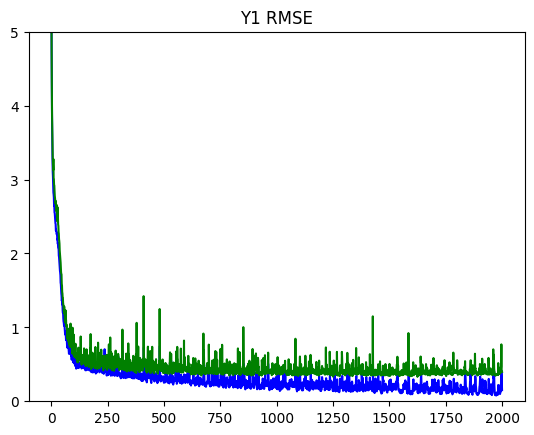

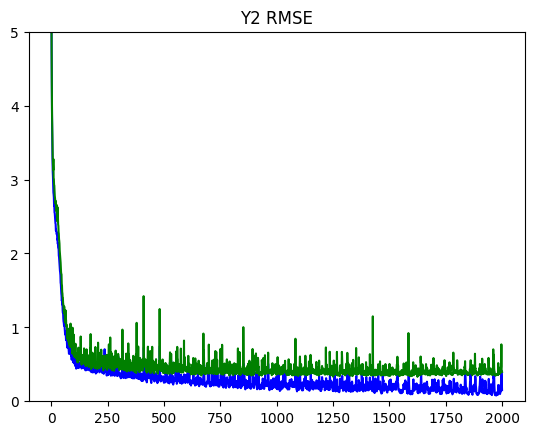

In [107]:
def plot_history(history, metric_name, title, ylim = 5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], label = metric_name, color = 'blue')
    metric_name = 'val_' + metric_name
    plt.plot(history.history[metric_name], label = metric_name, color = 'green')
    plt.show()
    
plot_history(history, 'y1_outputs_root_mean_squared_error', title = 'Y1 RMSE')
plot_history(history, 'y1_outputs_root_mean_squared_error', title = 'Y2 RMSE')

5/5 [==============================] - 0s 2ms/step


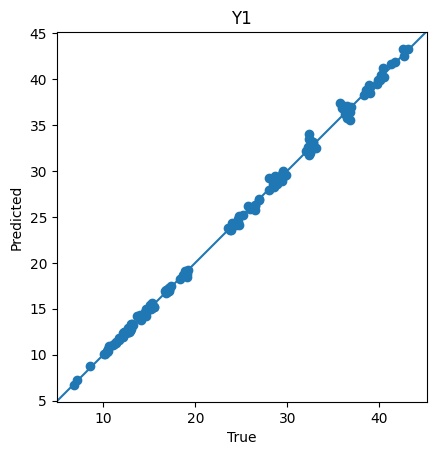

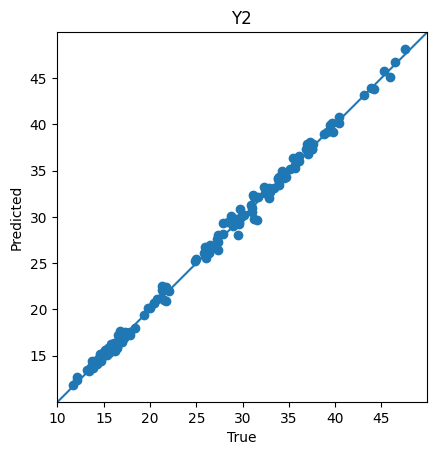

In [109]:
def plot_predictions(y_true, y_pred, title):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True')
    plt.ylabel('Predicted')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()
predicted = model.predict(test_X)
plot_predictions(y_true = test_Y[0], y_pred = predicted[0], title = 'Y1')
plot_predictions(y_true = test_Y[1], y_pred = predicted[1], title = 'Y2')

In [110]:
model.save('energy_efficiency.h5', save_format='h5')